In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('es_sp_orders_q1_full_last_version.dsv', sep=';', low_memory=False)

In [4]:
data.head()

,SCM_N_ORDER_POS_NR,SCM_N_ORDER_NR,TDT_T_KEY_ORDER_DATE,THR_C_KEY_ORDER_HOUR,SIT_N_KEY_SITE,CUS_N_KEY_CUSTOMER,SCM_SALES_BMF,SCM_SALES_CANCEL_BMF,SCM_D_FINANCE_CM1,SCM_D_FINANCE_CM2,...,CZP_EXPIRY_DATE,CZP_ZTQ_ID,CZP_PERCENTAGE,CZP_PRICE,ORF_EXT_O_ID,ORF_EXT_K_ID,ORF_EXT_ROOT_K_ID,OP_AS_ID,OP_BONUSPOINTS,BP_TYP
0,438079969,102712708,17/01/18,11:47,15,2443666,"39,99",0,"5,6745","2,5511",...,18/01/18,54,5,"9,9",102712708,2443666,2443666,2033923,0,NaN
1,438079970,102712708,17/01/18,11:47,15,2443666,"-2,8",0,"-2,5042","-2,5042",...,18/01/18,54,5,"9,9",102712708,2443666,2443666,6,0,NaN
2,438079968,102712708,17/01/18,11:47,15,2443666,"9,99",0,"5,3562","1,1169",...,18/01/18,54,5,"9,9",102712708,2443666,2443666,1695366,0,NaN
3,438079967,102712708,17/01/18,11:47,15,2443666,"5,99",0,"1,4055","1,133",...,18/01/18,54,5,"9,9",102712708,2443666,2443666,825102,0,NaN
4,434331841,101815800,04/01/18,15:46,15,2443666,"9,99",0,"5,3562","1,7385",...,18/01/18,54,5,"9,9",101815800,2443666,2443666,1681103,0,NaN


In [5]:
data['ORDER_DATETIME'] = pd.to_datetime(data['TDT_T_KEY_ORDER_DATE'] + ' ' + data['THR_C_KEY_ORDER_HOUR'] + ':00', 
                                        format="%d/%m/%y %H:%M:%S")

In [6]:
data['TDT_T_KEY_ORDER_DATE'] = pd.to_datetime(data['TDT_T_KEY_ORDER_DATE'], format="%d/%m/%y")

In [7]:
data['CZP_START_DATE'] = pd.to_datetime(data['CZP_START_DATE'], format="%d/%m/%y")
data['CZP_EXPIRY_DATE'] = pd.to_datetime(data['CZP_EXPIRY_DATE'], format="%d/%m/%y")

In [8]:
lista = [float(str(i).replace(',','.')) for i in data['SCM_SALES_BMF'].values]
data['SCM_SALES_BMF'] = lista

In [9]:
lista0 = [float(str(i).replace(',','.')) for i in data['SCM_D_ORIG_FINANCE_ORDER_NET'].values]
data['SCM_D_ORIG_FINANCE_ORDER_NET'] = lista0

In [10]:
data['FINANCE_ORDER_NET'] = data['SCM_D_ORIG_FINANCE_ORDER_NET'].groupby(data['SCM_N_ORDER_NR']).transform('sum')

In [11]:
lista1 = [float(str(i).replace(',','.')) for i in data['SCM_SALES_CANCEL_BMF'].values]
data['SCM_SALES_CANCEL_BMF'] = lista1

In [12]:
lista2 = [float(str(i).replace(',','.')) for i in data['SCM_D_FINANCE_CM1'].values]
data['SCM_D_FINANCE_CM1'] = lista2

In [13]:
lista3 = [float(str(i).replace(',','.')) for i in data['SCM_D_FINANCE_CM2'].values]
data['SCM_D_FINANCE_CM2'] = lista3

In [14]:
lista4 = [float(str(i).replace(',','.')) for i in data['CZP_PRICE'].values]
data['CZP_PRICE'] = lista4

In [15]:
data['REL_CM1'] = data['SCM_D_FINANCE_CM1'] / data['FINANCE_ORDER_NET'] * 100

In [16]:
data['REL_CM2'] = data['SCM_D_FINANCE_CM2'] / data['FINANCE_ORDER_NET'] * 100

In [17]:
#Convert date to calendar week number and month number
data['WEEK_NUMBER'] = data['TDT_T_KEY_ORDER_DATE'].dt.week
data['MONTH_NUMBER'] = data['TDT_T_KEY_ORDER_DATE'].dt.month

In [18]:
len(data), len(data['SCM_N_ORDER_NR'].unique())

(476231, 84920)

In [19]:
#CHECK DUPLICATED ROWS

In [20]:
dupl_mask = [len(i) > 1 for i in data.groupby('SCM_N_ORDER_NR')['CZP_START_DATE'].unique().values]

In [21]:
len(dupl_mask), sum(dupl_mask)

(84920, 256)

In [22]:
dup_orders = data.groupby('SCM_N_ORDER_NR')['CZP_START_DATE'].unique()[dupl_mask].index.values

In [23]:
dup_orders[:10]

array([101723066, 102566548, 102743787, 103565057, 104096021, 105065991,
       106308325, 106590851, 106591373, 106598355], dtype=int64)

In [24]:
len(dup_orders)

256

In [25]:
len(data[data['SCM_N_ORDER_NR'].isin(dup_orders)])

3644

In [26]:
cust_2_dup_orders = data[data['SCM_N_ORDER_NR'].isin(dup_orders)].groupby('CUS_N_KEY_CUSTOMER')['SCM_N_ORDER_NR'].nunique()[\
data[data['SCM_N_ORDER_NR'].isin(dup_orders)].groupby('CUS_N_KEY_CUSTOMER')['SCM_N_ORDER_NR'].nunique() > 1].index.values

In [27]:
cust_2_dup_orders

array([], dtype=int64)

In [28]:
data[(data['CUS_N_KEY_CUSTOMER'].isin(cust_2_dup_orders)) & (data['SCM_N_ORDER_NR'].isin(dup_orders))]['SCM_N_ORDER_NR'].unique()

array([], dtype=int64)

In [29]:
#Let's get incorrect duplicated indexes instead of order_id to exclude them and select the correct data subset
dup_indexes = []

for i in dup_orders:
    o_id = data[data['SCM_N_ORDER_NR'] == i]
    if o_id['CUS_N_KEY_CUSTOMER'].unique() not in cust_2_dup_orders:
        sp_dates = o_id['CZP_START_DATE'].value_counts().index.values
        min_date = o_id[o_id['CZP_START_DATE'] < max(sp_dates)]
        dup_indexes.append(min_date.index.values)

In [30]:
len(dup_indexes)

256

In [31]:
for c in cust_2_dup_orders:
    #print('Customer', c)
    cust_orders = data[(data['CUS_N_KEY_CUSTOMER'] == c) & (data['SCM_N_ORDER_NR'].isin(dup_orders))]
    if cust_orders['SCM_IS_ZSP_ORDER'].sum() >= 1:
        #print('SP Sold')
        sp_datetime = cust_orders[cust_orders['SCM_MASTER_AP_ID'] == 42225]['ORDER_DATETIME'].unique()[0]
        if (o_id['ORDER_DATETIME'] < sp_datetime).sum() > 0:
            #print('One order before SP')
            before = cust_orders[cust_orders['ORDER_DATETIME'] < sp_datetime]
            sp_dates_b = before['CZP_START_DATE'].value_counts().index.values
            max_date_b = before[before['CZP_START_DATE'] > min(sp_dates)]
            max_dates_b = list(max_date_b.index.values)
            
            after = o_id[o_id['ORDER_DATETIME'] >= sp_datetime]
            sp_dates_a = after['CZP_START_DATE'].value_counts().index.values
            min_date_a = after[after['CZP_START_DATE'] < max(sp_dates)]
            min_dates_a = list(min_date_a.index.values)
            
            indexes_date_not_valid = max_dates_b + min_dates_a
            dup_indexes.append(indexes_date_not_valid)
        elif (o_id['ORDER_DATETIME'] < sp_datetime).sum() == 0:
            #print('One order after SP')
            sp_dates = cust_orders['CZP_START_DATE'].value_counts().index.values
            min_date = cust_orders[cust_orders['CZP_START_DATE'] < max(sp_dates)]
            dup_indexes.append(min_date.index.values)
        else:
            print('Something go wrong')
    elif cust_orders['SCM_IS_ZSP_ORDER'].sum() == 0:
        #print('No SP Sold')
        sp_dates = cust_orders['CZP_START_DATE'].value_counts().index.values
        min_date = cust_orders[cust_orders['CZP_START_DATE'] < max(sp_dates)]
        dup_indexes.append(min_date.index.values)

In [32]:
len(dup_indexes)

256

In [33]:
#Get a flatten list of indexes
dupl_ind = [i for lista in dup_indexes for i in lista]

In [34]:
len(dupl_ind)

1822

In [35]:
exclude_data = data.index.isin(dupl_ind)

In [36]:
data = data[~exclude_data]

In [37]:
len(data)

474409

In [38]:
sum(len(i) > 1 for i in data.groupby('SCM_N_ORDER_NR')['CZP_START_DATE'].unique().values)

0

In [39]:
ztq = [51, 52, 53, 54, 55, 56]

## Gathering metrics

In [40]:
metrics_ztq = pd.DataFrame(columns=['ZTQ','active_customers', 'orders', 'sales_bmf', 'net_sales', 'CM1', 'CM2', 'CM1%', 'CM2%',
                                   'discount_amount', 'orders_%_neg_cm1', 'loss_in_CM1', 'orders_%_neg_cm2', 'loss_in_CM2'])
for tq in ztq:
    df_elems = []
    data_tier = data[data['CZP_ZTQ_ID'] == tq]
    #print('*** Tier ', tq, '***')
    df_elems.append(tq)
    #print('Active customers in selected period: ', data_tier['CUS_N_KEY_CUSTOMER'].nunique())
    df_elems.append(data_tier['CUS_N_KEY_CUSTOMER'].nunique())
    #print('Total orders placed: ', data_tier['SCM_N_ORDER_NR'].nunique())
    df_elems.append(data_tier['SCM_N_ORDER_NR'].nunique())
    #print('Total sales BMF: ', (data_tier['SCM_SALES_BMF'] - data_tier['SCM_SALES_CANCEL_BMF']).sum())
    df_elems.append((data_tier['SCM_SALES_BMF'] - data_tier['SCM_SALES_CANCEL_BMF']).sum())
    #print('Total net sales: ', data_tier.groupby('SCM_N_ORDER_NR')['OSP_NET_VALUE'].mean().sum())
    df_elems.append(data_tier.groupby('SCM_N_ORDER_NR')['FINANCE_ORDER_NET'].mean().sum())
    #print('Total CM1: ', data_tier['SCM_D_FINANCE_CM1'].sum())
    df_elems.append(data_tier['SCM_D_FINANCE_CM1'].sum())
    #print('Total CM2: ', data_tier['SCM_D_FINANCE_CM2'].sum())
    df_elems.append(data_tier['SCM_D_FINANCE_CM2'].sum())
    #print('Total CM1%: ', data_tier['SCM_D_FINANCE_CM1'].sum() / data_tier.groupby('SCM_N_ORDER_NR')['OSP_NET_VALUE'].mean().sum() * 100)
    df_elems.append(data_tier['SCM_D_FINANCE_CM1'].sum() / data_tier.groupby('SCM_N_ORDER_NR')['FINANCE_ORDER_NET'].mean().sum() * 100)
    #print('Total CM2%: ', data_tier['SCM_D_FINANCE_CM2'].sum() / data_tier.groupby('SCM_N_ORDER_NR')['OSP_NET_VALUE'].mean().sum() * 100)
    df_elems.append(data_tier['SCM_D_FINANCE_CM2'].sum() / data_tier.groupby('SCM_N_ORDER_NR')['FINANCE_ORDER_NET'].mean().sum() * 100)
    #print('-----')
    #print('Total discount given by ZP: ', (data_tier[data_tier['SCM_MASTER_AP_ID'] == 42715]['SCM_SALES_BMF'] - \
    #                                        data_tier[data_tier['SCM_MASTER_AP_ID'] == 42715]['SCM_SALES_CANCEL_BMF']).sum())
    df_elems.append((data_tier[data_tier['SCM_MASTER_AP_ID'] == 42715]['SCM_SALES_BMF'] - \
                                            data_tier[data_tier['SCM_MASTER_AP_ID'] == 42715]['SCM_SALES_CANCEL_BMF']).sum())
    #print('-----')
    cm1_per_order = data_tier.groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum()
    cm1_per_order[cm1_per_order <= 0].sum()
    orders_neg_cm1 = cm1_per_order[cm1_per_order <= 0].index.values
    
    #print('Total orders with negative CM1: ', len(orders_neg_cm1))
    #print('% Orders with negative CM1: ', len(orders_neg_cm1)/data_tier['SCM_N_ORDER_NR'].nunique()*100)
    df_elems.append(len(orders_neg_cm1)/data_tier['SCM_N_ORDER_NR'].nunique()*100)
    #print('Total loss in CM1: ', cm1_per_order[cm1_per_order <= 0].sum())
    df_elems.append(cm1_per_order[cm1_per_order <= 0].sum())
    
    cm2_per_order = data_tier.groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM2'].sum()
    cm2_per_order[cm2_per_order <= 0].sum()
    orders_neg_cm2 = cm2_per_order[cm2_per_order <= 0].index.values
    orders_only_neg_cm2 = data_tier[~data_tier['SCM_N_ORDER_NR'].isin(orders_neg_cm1)].groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM2'].sum()\
    [data_tier[~data_tier['SCM_N_ORDER_NR'].isin(orders_neg_cm1)].groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM2'].sum() <= 0]
    orders_only_neg_cm2.sum()
    
    #print('Total orders with negative CM2: ', len(orders_neg_cm2))
    #print('% Orders with negative CM2: ', len(orders_neg_cm2)/data_tier['SCM_N_ORDER_NR'].nunique()*100)
    df_elems.append(len(orders_neg_cm2)/data_tier['SCM_N_ORDER_NR'].nunique()*100)
    #print('Total loss in CM2: ', cm2_per_order[cm2_per_order <= 0].sum())
    df_elems.append(cm2_per_order[cm2_per_order <= 0].sum())
    
    #print('....................................................................................................................')
    #print('....................................................................................................................')
    new_row = pd.DataFrame.from_records([df_elems], columns=metrics_ztq.columns)
    metrics_ztq = metrics_ztq.append(new_row, ignore_index=True)

+ active_customers: different customer_id placing orders
+ orders: total orders amount in the tier
+ CM1: total CM1 in the tier
+ CM2: total CM2 in the tier
+ CM1%: CM1/net_sales
+ CM2%: CM2/net_sales
+ discount_amount: discount provided due to SP
+ orders_%_neg_cm1: % of orders having negative CM1 
+ loss_in_CM1: CM1 sum from orders having negative CM1
+ orders_%_neg_cm2: % of orders having negative CM2 
+ loss_in_CM2: CM2 sum from orders having negative CM2

In [41]:
metrics_ztq.round(2)

,ZTQ,active_customers,orders,sales_bmf,net_sales,CM1,CM2,CM1%,CM2%,discount_amount,orders_%_neg_cm1,loss_in_CM1,orders_%_neg_cm2,loss_in_CM2
0,51,15155,29402,2114942.65,1913455.38,512606.28,181180.97,26.79,9.47,-65702.88,0.41,-441.00,19.96,-17856.64
1,52,10008,19968,1589534.23,1433458.62,369782.58,127792.63,25.80,8.91,-49825.33,0.70,-1243.58,22.89,-16235.09
2,53,5017,9602,733261.68,662435.26,174238.24,62216.29,26.30,9.39,-38870.91,0.64,-430.76,23.29,-8159.83
3,54,5109,10621,922371.19,831779.70,196949.47,62158.88,23.68,7.47,-49454.77,2.26,-2211.95,28.59,-14841.06
4,55,1032,1617,99232.14,89830.24,23046.59,6744.82,25.66,7.51,-3055.61,0.37,-53.60,26.53,-1279.53
5,56,7070,13695,1006308.73,909896.10,202047.53,57336.27,22.21,6.30,-55300.68,1.39,-1129.13,30.25,-16161.06


In [42]:
def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

In [43]:
metrics_ztq.round(2).style.apply(highlight_max)

,ZTQ,active_customers,orders,sales_bmf,net_sales,CM1,CM2,CM1%,CM2%,discount_amount,orders_%_neg_cm1,loss_in_CM1,orders_%_neg_cm2,loss_in_CM2
0,51,15155,29402,2.11494e+06,1.91346e+06,512606,181181,26.79,9.47,-65702.9,0.41,-441,19.96,-17856.6
1,52,10008,19968,1.58953e+06,1.43346e+06,369783,127793,25.8,8.91,-49825.3,0.7,-1243.58,22.89,-16235.1
2,53,5017,9602,733262,662435,174238,62216.3,26.3,9.39,-38870.9,0.64,-430.76,23.29,-8159.83
3,54,5109,10621,922371,831780,196949,62158.9,23.68,7.47,-49454.8,2.26,-2211.95,28.59,-14841.1
4,55,1032,1617,99232.1,89830.2,23046.6,6744.82,25.66,7.51,-3055.61,0.37,-53.6,26.53,-1279.53
5,56,7070,13695,1.00631e+06,909896,202048,57336.3,22.21,6.3,-55300.7,1.39,-1129.13,30.25,-16161.1


## Behaviour per Tier

Histograms show frequencies from data values in a sample. We will see those for order number (order_ko_count_net, meaning the nth order the customer has placed) and other one based on basket value.

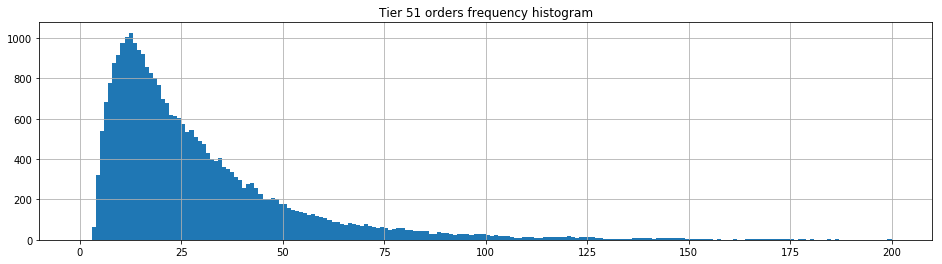

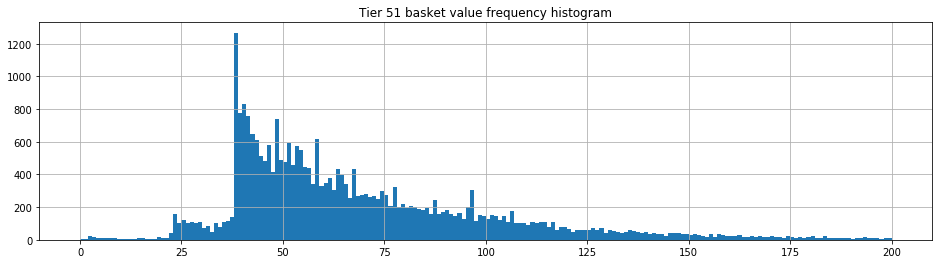

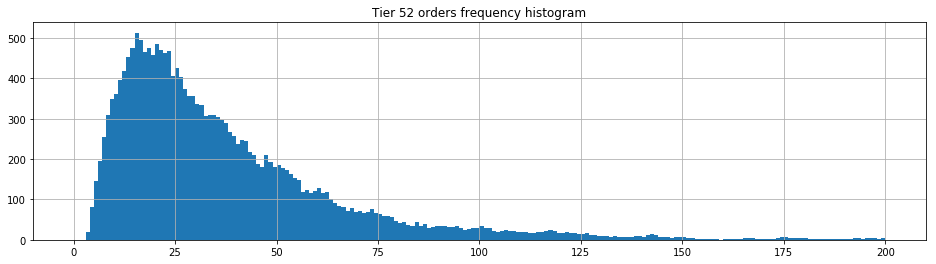

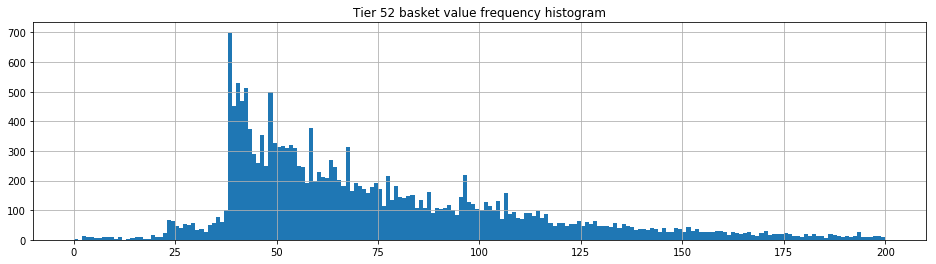

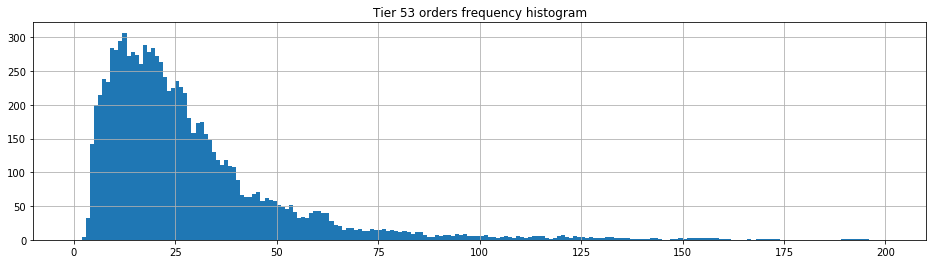

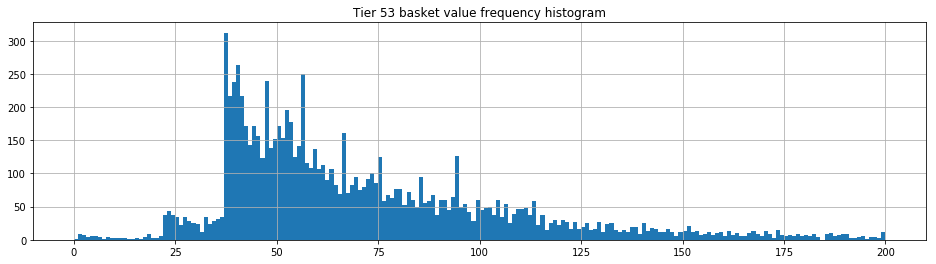

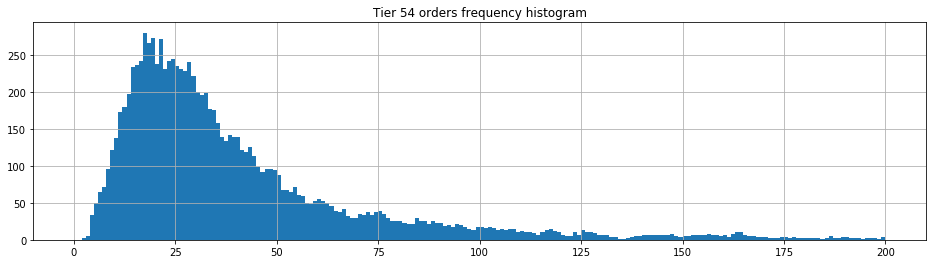

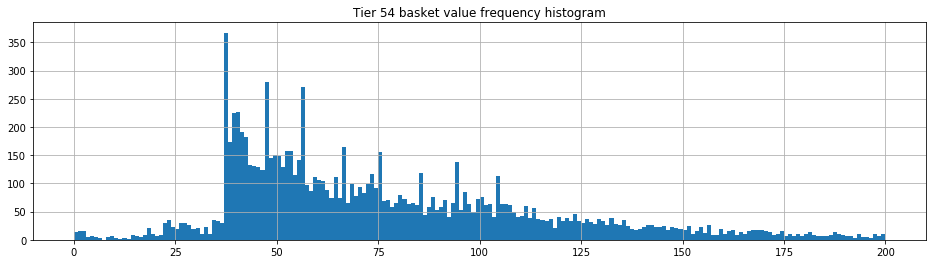

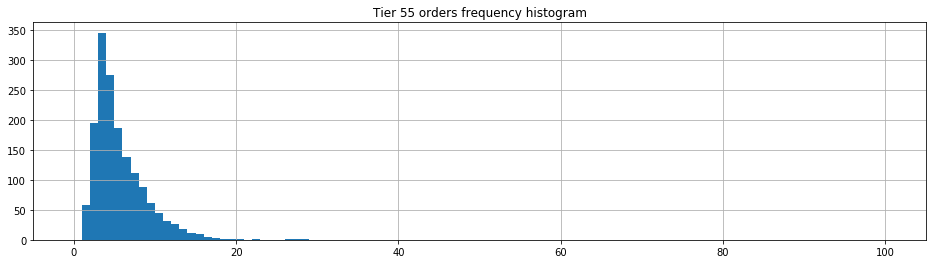

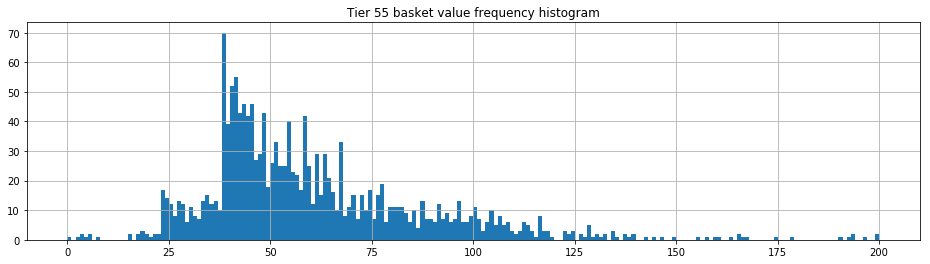

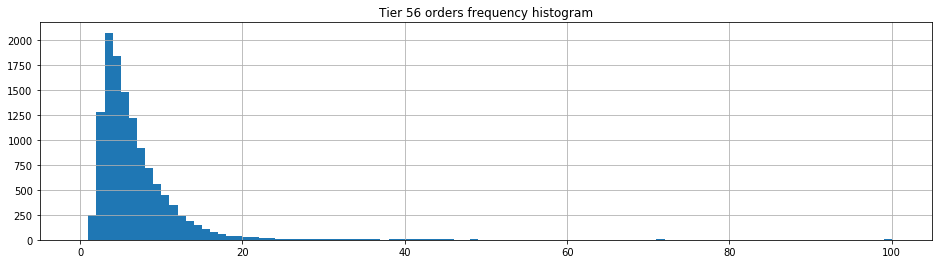

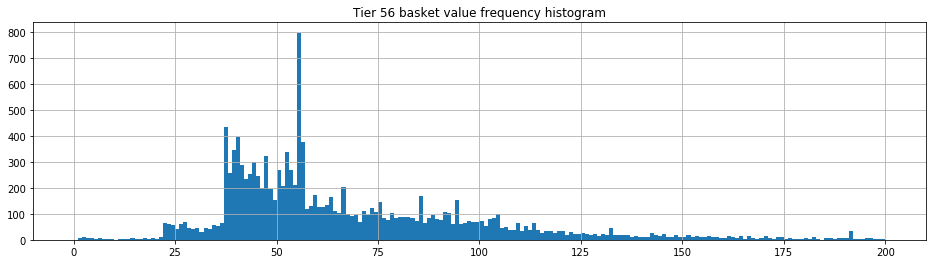

In [44]:
orders_summary = pd.DataFrame(columns = ['ZTQ', 'count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'])
basket_value_summary = pd.DataFrame(columns = ['ZTQ', 'count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'])

for tq in ztq:
    data_tier = data[data['CZP_ZTQ_ID'] == tq]
    if tq in [51, 52, 53, 54]:
        plt.figure(figsize=(16,4))
        #plt.subplot(211)
        order_ko_count_net = data_tier.groupby('SCM_N_ORDER_NR', as_index=False)['OSP_KO_COUNT_NET'].mean()
        order_ko_count_net['OSP_KO_COUNT_NET'].hist(bins=200, range=(0, 200))
        title = 'Tier ' + str(tq) + ' orders frequency histogram'
        plt.title(title)
        plt.show()
        ord_values = list(order_ko_count_net['OSP_KO_COUNT_NET'].describe().values)
        new_row = pd.DataFrame.from_records([[tq] +  ord_values], columns=orders_summary.columns)
        orders_summary = orders_summary.append(new_row, ignore_index=True)
        
        plt.figure(figsize=(16,4))
        #plt.subplot(212)
        sales_per_order = data_tier.groupby('SCM_N_ORDER_NR')['SCM_SALES_BMF'].sum() -\
        data_tier.groupby('SCM_N_ORDER_NR')['SCM_SALES_CANCEL_BMF'].sum()
        sales_per_order.hist(bins=200, range=(0, 200))
        title = 'Tier ' + str(tq) + ' basket value frequency histogram'
        plt.title(title)
        plt.show()
        basket_values = list(sales_per_order.describe().values)
        new_row = pd.DataFrame.from_records([[tq] +  basket_values], columns=basket_value_summary.columns)
        basket_value_summary = basket_value_summary.append(new_row, ignore_index=True)
        
    else:
        plt.figure(figsize=(16,4))
        #plt.subplot(211)
        order_ko_count_net = data_tier.groupby('SCM_N_ORDER_NR', as_index=False)['OSP_KO_COUNT_NET'].mean()
        order_ko_count_net['OSP_KO_COUNT_NET'].hist(bins=100, range=(0, 100))
        title = 'Tier ' + str(tq) + ' orders frequency histogram'
        plt.title(title)
        plt.show()
        ord_values = list(order_ko_count_net['OSP_KO_COUNT_NET'].describe().values)
        new_row = pd.DataFrame.from_records([[tq] +  ord_values], columns=orders_summary.columns)
        orders_summary = orders_summary.append(new_row, ignore_index=True)
        
        plt.figure(figsize=(16,4))
        #plt.subplot(212)
        sales_per_order = data_tier.groupby('SCM_N_ORDER_NR')['SCM_SALES_BMF'].sum() -\
        data_tier.groupby('SCM_N_ORDER_NR')['SCM_SALES_CANCEL_BMF'].sum()
        sales_per_order.hist(bins=200, range=(0, 200))
        title = 'Tier ' + str(tq) + ' basket value frequency histogram'
        plt.title(title)
        plt.show()
        basket_values = list(sales_per_order.describe().values)
        new_row = pd.DataFrame.from_records([[tq] +  basket_values], columns=basket_value_summary.columns)
        basket_value_summary = basket_value_summary.append(new_row, ignore_index=True)

And gather them into two tables...

In [45]:
#ORDERS HISTOGRAM SUMMARY
orders_summary.round(2).style.apply(highlight_max)

,ZTQ,count,mean,std,min,25%,50%,75%,max
0,51,29402,29.41,28.14,3,13,22,37,410
1,52,19968,39.27,53.17,3,18,29,48,4016
2,53,9602,28.31,25.06,2,13,22,35,269
3,54,10621,52.21,94.48,2,19,31,52,2690
4,55,1617,5.17,3.25,1,3,4,7,28
5,56,13695,279.61,887.02,1,3,5,9,7571


In [46]:
#BASKET VALUE HISTOGRAM SUMMARY
basket_value_summary.round(2).style.apply(highlight_max)

,ZTQ,count,mean,std,min,25%,50%,75%,max
0,51,29402,71.93,41.85,-29.02,45.53,59.64,86.58,1217.19
1,52,19968,79.6,49.76,-5.43,47.31,64.97,97.72,1064.78
2,53,9602,76.37,50.53,-3.54,45.59,61.7,92.12,944.45
3,54,10621,86.84,68.93,-6.47,47.49,69.3,104.49,2773.61
4,55,1617,61.37,29.81,-10.62,41.8,53.59,73.71,247.99
5,56,13695,73.48,63.22,-2.54,45.28,56.99,86.43,1786.16


**Existing customers:**

[Orders]

- Short term (1y renewal, Tier 51 3% & Tier 53 5%): 13-22-35 (Percentiles 25%, 50% and 75%)

- Long term (3y renewal, Tier 52 3% & Tier 54 5%): 18-30-50 (Percentiles 25%, 50% and 75%) 

Percentiles are around 40% greater in the long term, when duration is 3 times more. Is there a need to adjust the discount period to only 2 years? 

[Basket Value]

- Basket Value from Tier 53 < Tier 52 (expected to be closer to Tier 54 Basket Value, further analysis looking for a new renewal threshold that downgrade some customers)


**New customers:**

[Orders]

- Strong resellers activity in Tier 56


### Locate and quantify unprofitable  CM1 orders in absolute and relative terms regarding PG3 and PG4 levels per Tier

In [47]:
ord_cm1 = data.groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum()

In [48]:
ord_neg_cm1 = ord_cm1[ord_cm1 <= 0].index.values

In [49]:
data['IS_CM1_NEG_ORDER'] = data['SCM_N_ORDER_NR'].isin(ord_neg_cm1) * 1

In [50]:
ord_coupon = data[data['SCM_MASTER_AP_ID'] == 6169]['SCM_N_ORDER_NR'].unique()

In [51]:
data['ORDER_HAS_COUPON'] = data['SCM_N_ORDER_NR'].isin(ord_coupon) * 1

In [52]:
data['BP_TYP'].unique()

array([nan, 'B '], dtype=object)

In [53]:
ord_bp = data[data['BP_TYP'] == 'B ']['SCM_N_ORDER_NR'].unique()

In [54]:
ord_bp

array([101987505, 102568653, 101553297, ..., 107632844, 107612450,
       102314901], dtype=int64)

In [55]:
data['ORDER_HAS_BP'] = data['SCM_N_ORDER_NR'].isin(ord_bp) * 1

In [56]:
data['ORDER_HAS_C+BP'] = data['ORDER_HAS_COUPON'] * data['ORDER_HAS_BP']

In [57]:
import cx_Oracle

In [58]:
data['OSP_3_LEAD_P_PG_ID'].fillna(0).unique()

array([   252,    251,   2068,    857,    301,    221,     29,     23,
           68,    274,     18,     20,     34, 207553,   1540,    409,
         2190,  17947, 207624,     45, 126729,   2192,  40023,     38,
         1400,      9,     15,     62,     42,   2155,   2471,     67,
          741,     33,     37,    305,    758, 153317,     36,     47,
          470,  49828,    401,     48,   9788,     16,    484,   1635,
           51,    486,     65, 255413,     50, 126778,   1603,  49821,
         1106,   3119], dtype=int64)

In [59]:
pg3_l = list(data['OSP_3_LEAD_P_PG_ID'].fillna(0).unique())

In [60]:
pg3_list = repr(pg3_l).replace('[','(').replace(']',')') 

In [61]:
query = """select pg_id, pg_shortlink from ZOOMAN.PRODUCT_GROUPS
where pg_id in %s""" % pg3_list

In [62]:
conn = cx_Oracle.connect('zooor', 'zoo12or', 'zoorep', threaded=True, encoding = "UTF-8", nencoding = "UTF-8")
curs = conn.cursor()
pg3 = pd.read_sql(query, con = conn)
conn.close()

In [63]:
pg3_dict = {key: value for (key, value) in zip(pg3['PG_ID'], pg3['PG_SHORTLINK'])}

In [64]:
pg3_dict[0] = 'null'

In [65]:
lista_pg3 = [pg3_dict[i] for i in data['OSP_3_LEAD_P_PG_ID'].fillna(0)]

In [66]:
len(lista_pg3), len(data['OSP_3_LEAD_P_PG_ID'])

(474409, 474409)

In [67]:
data['LEAD_PG3_NAME'] = lista_pg3

In [68]:
pg4_l = list(data['OSP_4_LEAD_P_PG_ID'].fillna(0).unique())

In [69]:
0 in pg4_l

False

In [70]:
pg4_list = repr(pg4_l).replace('[','(').replace(']',')') 

In [71]:
query = """select pg_id, pg_shortlink from ZOOMAN.PRODUCT_GROUPS
where pg_id in %s""" % pg4_list

In [72]:
conn = cx_Oracle.connect('zooor', 'zoo12or', 'zoorep', threaded=True, encoding = "UTF-8", nencoding = "UTF-8")
curs = conn.cursor()
pg4 = pd.read_sql(query, con = conn)
conn.close()

In [73]:
pg4_dict = {key: value for (key, value) in zip(pg4['PG_ID'], pg4['PG_SHORTLINK'])}

In [74]:
pg4_dict[-1] = 'null'

In [75]:
lista_pg4 = [pg4_dict[i] for i in data['OSP_4_LEAD_P_PG_ID'].fillna(-1)]

In [76]:
len(lista_pg4), len(data['OSP_4_LEAD_P_PG_ID'])

(474409, 474409)

In [77]:
data['LEAD_PG4_NAME'] = lista_pg4

In [78]:
from IPython.display import display

+ OSP_3_LEAD_P_PG_ID
+ LEAD_PG3_NAME
+ OSP_4_LEAD_P_PG_ID
+ LEAD_PG4_NAME
+ IS_CM1_NEG_ORDER: flag 0-1, grouping all negative or positive orders regarding to CM1
+ SCM_N_ORDER_NR: orders amount for the corresponding flag
+ ORDERS_IN_PG: orders in product group (orders in flag 0, positives, plus orders in flag 1, negatives)
+ PERC_%_IN_PG: SCM_N_ORDER_NR / ORDERS_IN_PG
+ ORDER_HAS_COUPON: total orders using coupons
+ COUPONS_IN_PG: total coupons used in product group
+ COUPONS_%_IN_PG: ORDER_HAS_COUPON / COUPONS_IN_PG
+ ORDER_HAS_BP: total orders using coupons
+ BP_IN_PG: total orders having bonuspoints as payment in product group
+ BP_%_IN_PG: ORDER_HAS_BP / BP_IN_PG
+ SCM_D_FINANCE_CM1: CM1 sum from the orders in the flag
+ PERC_%_TOTAL_LOSS: CM1 sum divided by the total loss CM1 (sum CM1 for all negative CM1 orders)

In [79]:
orders_CM1 = data.groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum()
orders_CM1_neg = orders_CM1[orders_CM1 <= 0].index.values
print('Total orders: ', len(orders_CM1))
print('Total orders with negative CM1: ', len(orders_CM1_neg))
print('% of negative CM1 orders: ', len(orders_CM1_neg) / len(orders_CM1) * 100)
print('Total loss of CM1 (sum CM1 for all negative CM1 orders): ', orders_CM1[orders_CM1 <= 0].sum())
print('........................................................................................')
print('')
print('Unprofitable CM1 orders per Lead PG3 [Top 20]')
grp = data.groupby(['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME', 'SCM_N_ORDER_NR', 'IS_CM1_NEG_ORDER'], 
                            as_index=False)['SCM_D_FINANCE_CM1'].sum()
grp_c = data.groupby(['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME', 'SCM_N_ORDER_NR', 'IS_CM1_NEG_ORDER'], 
                              as_index=False)['ORDER_HAS_COUPON'].mean()
grp_bp = data.groupby(['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME', 'SCM_N_ORDER_NR', 'IS_CM1_NEG_ORDER'], 
                              as_index=False)['ORDER_HAS_BP'].mean()
grp_cbp = data.groupby(['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME', 'SCM_N_ORDER_NR', 'IS_CM1_NEG_ORDER'], 
                              as_index=False)['ORDER_HAS_C+BP'].mean()
df1 = grp.groupby(['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME', 'IS_CM1_NEG_ORDER'], as_index=False)['SCM_D_FINANCE_CM1'].sum()
df2 = grp.groupby(['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME', 'IS_CM1_NEG_ORDER'], as_index=False)['SCM_N_ORDER_NR'].count()
dfc = grp_c.groupby(['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME', 'IS_CM1_NEG_ORDER'], as_index=False)['ORDER_HAS_COUPON'].sum()
dfbp = grp_bp.groupby(['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME', 'IS_CM1_NEG_ORDER'], as_index=False)['ORDER_HAS_BP'].sum()
dfbpc = grp_cbp.groupby(['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME', 'IS_CM1_NEG_ORDER'], as_index=False)['ORDER_HAS_C+BP'].sum()
df3 = pd.merge(df1, df2, left_index=True, right_index=True, copy=False)
dfcbp = pd.merge(dfc, dfbp, left_index=True, right_index=True, copy=False)
df3cbp = pd.merge(df3, dfcbp, left_index=True, right_index=True, copy=False)
df_c_bp = pd.merge(df3cbp, dfbpc, left_index=True, right_index=True, copy=False)
df_c_bp = df_c_bp[['OSP_3_LEAD_P_PG_ID_x_x', 'LEAD_PG3_NAME_x_x', 'IS_CM1_NEG_ORDER_x_x', 'SCM_N_ORDER_NR',
                 'ORDER_HAS_COUPON', 'ORDER_HAS_BP', 'ORDER_HAS_C+BP', 'SCM_D_FINANCE_CM1']]
df_c_bp.columns = ['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME', 'IS_CM1_NEG_ORDER', 'SCM_N_ORDER_NR', 
                    'ORDER_HAS_COUPON', 'ORDER_HAS_BP', 'ORDER_HAS_C+BP', 'SCM_D_FINANCE_CM1']
df_c_bp['ORDERS_IN_PG'] = df_c_bp.groupby('OSP_3_LEAD_P_PG_ID')['SCM_N_ORDER_NR'].transform('sum')
df_c_bp['PERC_%_IN_PG'] = df_c_bp['SCM_N_ORDER_NR'] / df_c_bp['ORDERS_IN_PG'] * 100
df_c_bp['COUPONS_IN_PG'] = df_c_bp.groupby('OSP_3_LEAD_P_PG_ID')['ORDER_HAS_COUPON'].transform('sum')
#df3cbp['COUPONS_%_IN_PG'] = df3cbp['ORDER_HAS_COUPON'] / df3cbp['COUPONS_IN_PG'] * 100
df_c_bp['BP_IN_PG'] = df_c_bp.groupby('OSP_3_LEAD_P_PG_ID')['ORDER_HAS_BP'].transform('sum')
#df3cbp['BP_%_IN_PG'] = df3cbp['ORDER_HAS_BP'] / df3cbp['BP_IN_PG'] * 100
df_c_bp['C+BP_IN_PG'] = df_c_bp.groupby('OSP_3_LEAD_P_PG_ID')['ORDER_HAS_C+BP'].transform('sum')
df_c_bp['PERC_%_TOTAL_LOSS'] = df_c_bp['SCM_D_FINANCE_CM1'] / orders_CM1[orders_CM1 <= 0].sum() * 100
df_c_bp = df_c_bp[['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME', 'IS_CM1_NEG_ORDER', 'SCM_N_ORDER_NR','ORDERS_IN_PG', 'PERC_%_IN_PG',
              'ORDER_HAS_COUPON', 'COUPONS_IN_PG', #'COUPONS_%_IN_PG', 
              'ORDER_HAS_BP', 'BP_IN_PG', #'BP_%_IN_PG',
              'ORDER_HAS_C+BP', 'C+BP_IN_PG', 'SCM_D_FINANCE_CM1', 'PERC_%_TOTAL_LOSS']]
display(df_c_bp.round(2).sort_values(by='SCM_D_FINANCE_CM1').head(20))
print('........................................................................................')
print('')
print('Unprofitable CM1 orders per Lead PG4 [Top 20]')
grp_2 = data.groupby(['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME', 'OSP_4_LEAD_P_PG_ID', 'LEAD_PG4_NAME',
                               'SCM_N_ORDER_NR', 'IS_CM1_NEG_ORDER'], as_index=False)['SCM_D_FINANCE_CM1'].sum()
grp_2c = data.groupby(['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME','OSP_4_LEAD_P_PG_ID', 'LEAD_PG4_NAME',
                               'SCM_N_ORDER_NR', 'IS_CM1_NEG_ORDER'], as_index=False)['ORDER_HAS_COUPON'].mean()
grp_2b = data.groupby(['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME','OSP_4_LEAD_P_PG_ID', 'LEAD_PG4_NAME',
                               'SCM_N_ORDER_NR', 'IS_CM1_NEG_ORDER'], as_index=False)['ORDER_HAS_BP'].mean()
grp_2cb = data.groupby(['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME','OSP_4_LEAD_P_PG_ID', 'LEAD_PG4_NAME',
                               'SCM_N_ORDER_NR', 'IS_CM1_NEG_ORDER'], as_index=False)['ORDER_HAS_C+BP'].mean()
df1_2 = grp_2.groupby(['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME','OSP_4_LEAD_P_PG_ID', 'LEAD_PG4_NAME',
                           'IS_CM1_NEG_ORDER'], as_index=False)['SCM_D_FINANCE_CM1'].sum()
df2_2 = grp_2.groupby(['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME','OSP_4_LEAD_P_PG_ID', 'LEAD_PG4_NAME',
                           'IS_CM1_NEG_ORDER'], as_index=False)['SCM_N_ORDER_NR'].count()
dfc_2 = grp_2c.groupby(['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME', 'OSP_4_LEAD_P_PG_ID', 'LEAD_PG4_NAME',
                            'IS_CM1_NEG_ORDER'], as_index=False)['ORDER_HAS_COUPON'].sum()
dfbp_2 = grp_2b.groupby(['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME', 'OSP_4_LEAD_P_PG_ID', 'LEAD_PG4_NAME',
                            'IS_CM1_NEG_ORDER'], as_index=False)['ORDER_HAS_BP'].sum()
dfcbp_2 = grp_2cb.groupby(['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME', 'OSP_4_LEAD_P_PG_ID', 'LEAD_PG4_NAME',
                            'IS_CM1_NEG_ORDER'], as_index=False)['ORDER_HAS_C+BP'].sum()
df4 = pd.merge(df1_2, df2_2, left_index=True, right_index=True, copy=False)
dfc_2 = pd.merge(dfc_2, dfbp_2, left_index=True, right_index=True, copy=False)
df4c = pd.merge(df4, dfc_2, left_index=True, right_index=True, copy=False)
df4c = pd.merge(df4c, dfcbp_2, left_index=True, right_index=True, copy=False)
df4c = df4c[['OSP_3_LEAD_P_PG_ID_x_x', 'LEAD_PG3_NAME_x_x', 'OSP_4_LEAD_P_PG_ID_x_x', 'LEAD_PG4_NAME_x_x', 'IS_CM1_NEG_ORDER_x_x',
                 'SCM_N_ORDER_NR', 'ORDER_HAS_COUPON', 'ORDER_HAS_BP', 'ORDER_HAS_C+BP', 'SCM_D_FINANCE_CM1']]
df4c.columns = ['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME', 'OSP_4_LEAD_P_PG_ID', 'LEAD_PG4_NAME', 'IS_CM1_NEG_ORDER',
                    'SCM_N_ORDER_NR', 'ORDER_HAS_COUPON', 'ORDER_HAS_BP', 'ORDER_HAS_C+BP','SCM_D_FINANCE_CM1']
df4c['ORDERS_IN_PG'] = df4c.groupby(['OSP_3_LEAD_P_PG_ID', 'OSP_4_LEAD_P_PG_ID'])['SCM_N_ORDER_NR'].transform('sum')
df4c['PERC_%_IN_PG'] = df4c['SCM_N_ORDER_NR'] / df4c['ORDERS_IN_PG'] * 100
df4c['COUPONS_IN_PG'] = df4c.groupby(['OSP_3_LEAD_P_PG_ID', 'OSP_4_LEAD_P_PG_ID'])['ORDER_HAS_COUPON'].transform('sum')
#df4c['COUPONS_%_IN_PG'] = df4c['ORDER_HAS_COUPON'] / df4c['COUPONS_IN_PG'] * 100
df4c['BP_IN_PG'] = df4c.groupby(['OSP_3_LEAD_P_PG_ID', 'OSP_4_LEAD_P_PG_ID'])['ORDER_HAS_BP'].transform('sum')
#df4c['BP_%_IN_PG'] = df4c['ORDER_HAS_BP'] / df4c['BP_IN_PG'] * 100
df4c['C+BP_IN_PG'] = df4c.groupby(['OSP_3_LEAD_P_PG_ID', 'OSP_4_LEAD_P_PG_ID'])['ORDER_HAS_C+BP'].transform('sum')
df4c['PERC_%_TOTAL_LOSS'] = df4c['SCM_D_FINANCE_CM1'] / orders_CM1[orders_CM1 <= 0].sum() * 100
df4c = df4c[['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME', 'OSP_4_LEAD_P_PG_ID', 'LEAD_PG4_NAME', 'IS_CM1_NEG_ORDER', 'SCM_N_ORDER_NR',
                 'ORDERS_IN_PG', 'PERC_%_IN_PG', 'ORDER_HAS_COUPON', 'COUPONS_IN_PG', #'COUPONS_%_IN_PG', 
              'ORDER_HAS_BP', 'BP_IN_PG', #'BP_%_IN_PG', 
             'ORDER_HAS_C+BP', 'C+BP_IN_PG',
             'SCM_D_FINANCE_CM1', 'PERC_%_TOTAL_LOSS']]
display(df4c.round(2).sort_values(by='SCM_D_FINANCE_CM1').head(20))
print('........................................................................................')
print('........................................................................................')
print('')

Total orders:  84920
Total orders with negative CM1:  760
% of negative CM1 orders:  0.8949599623174752
Total loss of CM1 (sum CM1 for all negative CM1 orders):  -5510.0606
........................................................................................

Unprofitable CM1 orders per Lead PG3 [Top 20]


,OSP_3_LEAD_P_PG_ID,LEAD_PG3_NAME,IS_CM1_NEG_ORDER,SCM_N_ORDER_NR,ORDERS_IN_PG,PERC_%_IN_PG,ORDER_HAS_COUPON,COUPONS_IN_PG,ORDER_HAS_BP,BP_IN_PG,ORDER_HAS_C+BP,C+BP_IN_PG,SCM_D_FINANCE_CM1,PERC_%_TOTAL_LOSS
38,252,katzenfutter_trockenfutter,1,267,20985,1.27,194,4298,93,4448,46,1078,-2328.72,42.26
36,251,hundefutter_trockenfutter,1,205,32024,0.64,138,5713,80,5980,35,1380,-1240.40,22.51
62,2068,katzenfutter_dose,1,66,10701,0.62,47,2730,35,2375,18,735,-667.66,12.12
3,15,hundeleine_hundehalsband,1,4,303,1.32,1,45,3,54,0,10,-391.29,7.10
53,857,hundefutter_nassfutter,1,14,2464,0.57,14,512,7,508,7,134,-198.69,3.61
82,207553,ungezieferschutz,1,30,1956,1.53,13,357,20,447,7,101,-178.99,3.25
18,36,katzenspielzeug,1,1,149,0.67,0,17,1,36,0,7,-111.32,2.02
56,1400,hundefutter_ergaenzung,1,15,588,2.55,6,95,7,123,3,33,-84.91,1.54
6,18,hundesnacks,1,12,2033,0.59,5,371,6,512,1,122,-49.69,0.90
41,301,katzenstreu,1,8,5788,0.14,6,974,2,1120,1,261,-38.55,0.70


........................................................................................

Unprofitable CM1 orders per Lead PG4 [Top 20]


,OSP_3_LEAD_P_PG_ID,LEAD_PG3_NAME,OSP_4_LEAD_P_PG_ID,LEAD_PG4_NAME,IS_CM1_NEG_ORDER,SCM_N_ORDER_NR,ORDERS_IN_PG,PERC_%_IN_PG,ORDER_HAS_COUPON,COUPONS_IN_PG,ORDER_HAS_BP,BP_IN_PG,ORDER_HAS_C+BP,C+BP_IN_PG,SCM_D_FINANCE_CM1,PERC_%_TOTAL_LOSS
778,252,katzenfutter_trockenfutter,683,royal_canin,1,88,4565,1.93,55,881,47,962,23,212,-605.52,10.99
910,252,katzenfutter_trockenfutter,81397,royal_canin_veterinary_diet,1,73,2332,3.13,65,420,8,433,3,89,-421.43,7.65
701,251,hundefutter_trockenfutter,81396,royal_canin_veterinary_diet,1,70,2937,2.38,63,492,15,392,11,84,-383.04,6.95
50,15,hundeleine_hundehalsband,16637,funktionsleine,1,2,11,18.18,0,1,2,2,0,0,-365.98,6.64
833,252,katzenfutter_trockenfutter,2712,cat_chow,1,2,48,4.17,0,6,0,7,0,0,-329.45,5.98
1365,2068,katzenfutter_dose,2072,gourmet,1,18,1815,0.99,11,437,14,408,7,116,-287.77,5.22
839,252,katzenfutter_trockenfutter,3641,smilla,1,13,524,2.48,13,145,2,118,2,34,-205.25,3.72
612,251,hundefutter_trockenfutter,682,royal_canin_size,1,38,3962,0.96,23,639,22,692,8,142,-173.57,3.15
872,252,katzenfutter_trockenfutter,31963,hills_prescription_diet,1,12,2370,0.51,10,410,3,447,2,80,-155.04,2.81
678,251,hundefutter_trockenfutter,31962,hills_prescription_diet,1,10,4204,0.24,7,622,5,656,2,134,-136.24,2.47


........................................................................................
........................................................................................



Be care of price policy and coupon compatibility in these cases: 
- katzenfutter_trockenfutter (specially royal canin and royal canin veterinary diet)
- hundefutter_trockenfutter (royal canin veterinary diet)
- katzenfutter_dose (gourmet, cosma...)

## A level down through physical article level...

In [80]:
ap_list = list(data['SCM_AP_ID'].unique())

In [81]:
len(ap_list)

7426

In [82]:
ap_list.remove(0)

In [83]:
0 in ap_list

False

In [84]:
xlist = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000]
ylist = [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000]

arts = pd.DataFrame()
for x, y in zip(xlist, ylist):
    my_list_str = repr(ap_list[x:y]).replace('[','(').replace(']',')') 
    conn = cx_Oracle.connect('zooor', 'zoo12or', 'zoorep', threaded=True, encoding = "UTF-8", nencoding = "UTF-8")
    curs = conn.cursor()
    #query = """select ap_short_text, ap_id, ap_pp_id, pp_id, pp_name from ZOOMAN.ARTICLES_PHYSICAL zap
    #join ZOOMAN.PRODUCTS_PHYSICAL zpp on zap.ap_pp_id = zpp.pp_id
    #where to_char(ap_id) = :valores"""
    #art = pd.read_sql(query, con = conn, params={'valores': str(i)})
    query = """select ap_short_text, ap_id, ap_pp_id, pp_id, pp_name from ZOOMAN.ARTICLES_PHYSICAL zap
    join ZOOMAN.PRODUCTS_PHYSICAL zpp on zap.ap_pp_id = zpp.pp_id
    where ap_id in %s""" % my_list_str
    art = pd.read_sql(query, con = conn)
    arts = pd.concat((arts, art), axis=0, ignore_index=False)
    conn.close()    
    print(x, y)

0 1000
1000 2000
2000 3000
3000 4000
4000 5000
5000 6000
6000 7000
7000 8000


In [85]:
arts['AP_NAME'] = arts['PP_NAME'] + ' ' + arts['AP_SHORT_TEXT']

### Physical Article CM1

In [86]:
freq_list = []
for i in ap_list:
    ap_id = data[data['SCM_AP_ID'] == i]
    total_orders = ap_id['SCM_N_ORDER_NR'].nunique()
    total_orders_bp = ap_id[ap_id['OP_BONUSPOINTS'] != 0]['SCM_N_ORDER_NR'].nunique()
    lis_o_ap_id_neg_cm1 = ap_id[ap_id['SCM_D_FINANCE_CM1'] <= 0]['SCM_N_ORDER_NR'].unique()
    lis_o_ap_id_pos_cm1 = ap_id[ap_id['SCM_D_FINANCE_CM1'] > 0]['SCM_N_ORDER_NR'].unique()
    cnt_o_id_neg_cm1_ap_id_neg_cm1 = sum(data[data['SCM_N_ORDER_NR'].isin(lis_o_ap_id_neg_cm1)].groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum() <= 0)
    cnt_o_id_neg_cm1_ap_id_pos_cm1 = sum(data[data['SCM_N_ORDER_NR'].isin(lis_o_ap_id_pos_cm1)].groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum() <= 0)
    cnt_o_id_pos_cm1_ap_id_neg_cm1 = sum(data[data['SCM_N_ORDER_NR'].isin(lis_o_ap_id_neg_cm1)].groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum() > 0)
    cnt_o_id_pos_cm1_ap_id_pos_cm1 = sum(data[data['SCM_N_ORDER_NR'].isin(lis_o_ap_id_pos_cm1)].groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum() > 0)
    prod_name = arts[arts['AP_ID'] == i]['AP_NAME'].iloc[0]
    freq_list.append([i
                    , prod_name
                    , ap_id['SCM_D_FINANCE_CM1'].describe()['mean']
                    , ap_id['SCM_D_FINANCE_CM1'].describe()['min']
                    , ap_id['SCM_D_FINANCE_CM1'].describe()['max']
                    , ap_id['SCM_D_FINANCE_CM1'].describe()['25%']
                    , ap_id['SCM_D_FINANCE_CM1'].describe()['50%']
                    , ap_id['SCM_D_FINANCE_CM1'].describe()['75%']
                    , total_orders
                    , total_orders_bp
                    , cnt_o_id_neg_cm1_ap_id_neg_cm1
                    , cnt_o_id_neg_cm1_ap_id_pos_cm1
                    , cnt_o_id_pos_cm1_ap_id_neg_cm1
                    , cnt_o_id_pos_cm1_ap_id_pos_cm1
                     ])

In [87]:
freq_df = pd.DataFrame(freq_list, columns=['SCM_AP_ID', 'AP_NAME', 'CM1_MEAN', 'CM1_MIN', 'CM1_MAX',
                                           'PERC_25', 'PERC_50', 'PERC_75',
                                           'TOT_ORDERS', 'TOT_ORDERS_BP', 'OCM1_NEG_APCM1_NEG', 'OCM1_NEG_APCM1_POS', 
                                           'OCM1_POS_APCM1_NEG', 'OCM1_POS_APCM1_POS'])

In [88]:
freq_df['PERC_APCM1_NEG'] = (freq_df['OCM1_NEG_APCM1_NEG'] + freq_df['OCM1_POS_APCM1_NEG']) / freq_df['TOT_ORDERS'] * 100

In [89]:
freq_df['PERC_OCM1_NEG'] = freq_df['OCM1_NEG_APCM1_NEG'] / freq_df['TOT_ORDERS'] * 100

+ SCM_AP_ID: physical article id
+ AP_NAME: physical article name
+ CM1_MEAN: average CM1
+ CM1_MIN
+ CM1_MAX
+ PERC_25: percentile 25
+ PERC_50: median 
+ PERC_75: percentile 75
+ TOT_ORDERS: orders in which physical article is present
+ TOT_ORDERS_BP: orders in which physical article has been bought using bonuspoints
+ OCM1_NEG_APCM1_NEG: orders with negative cm1 having physical article in the order negative cm1 too 
+ OCM1_NEG_APCM1_POS: orders with negative cm1 having physical article in the order positive cm1
+ OCM1_POS_APCM1_NEG: orders with positive cm1 having physical article in the order negative cm1
+ OCM1_POS_APCM1_POS: orders with positive cm1 having physical article in the order positive cm1 too
+ PERC_APCM1_NEG: (OCM1_NEG_APCM1_NEG + OCM1_POS_APCM1_NEG)/ TOT_ORDERS
+ PERC_OCM1_NEG: OCM1_NEG_APCM1_NEG / TOT_ORDERS

Let's get physical artical having more than 30 orders placed and, in more than 40% of the cases, AP_ID CM1 is negative...

In [90]:
freq_df[(freq_df['TOT_ORDERS'] > 30) & 
        (freq_df['PERC_APCM1_NEG'] > 40)].round(2)\
.sort_values(by='PERC_APCM1_NEG', ascending=False).head(60)

,SCM_AP_ID,AP_NAME,CM1_MEAN,CM1_MIN,CM1_MAX,PERC_25,PERC_50,PERC_75,TOT_ORDERS,TOT_ORDERS_BP,OCM1_NEG_APCM1_NEG,OCM1_NEG_APCM1_POS,OCM1_POS_APCM1_NEG,OCM1_POS_APCM1_POS,PERC_APCM1_NEG,PERC_OCM1_NEG
7397,77014,Wolf of Wilderness 100 g - Green Fields Adult,-0.27,-0.27,-0.27,-0.27,-0.27,-0.27,124,0,0,0,124,0,100.00,0.00
598,65401,Briantos Adult Lamm & Reis - 800 g,-1.01,-4.00,-0.96,-0.96,-0.96,-0.96,122,122,5,0,117,0,100.00,4.10
1260,23170,Extra Bonuspunkte - 100 Bonuspunkte extra,0.00,0.00,0.00,0.00,0.00,0.00,379,0,9,0,370,0,100.00,2.37
183,9795,Spende für bedürftige Tiere -,0.00,0.00,0.00,0.00,0.00,0.00,3103,3093,22,0,3081,0,100.00,0.71
1059,71265,Wolf of Wilderness Wild Hills 1x400g Einzeldos...,-0.74,-0.75,-0.73,-0.74,-0.73,-0.73,131,131,0,0,131,0,100.00,0.00
139,20886,Extra Bonuspunkte - 200 Bonuspunkte extra,0.00,0.00,0.00,0.00,0.00,0.00,2648,0,52,0,2596,0,100.00,1.96
501,74612,Wolf of Wilderness 80 g - Green Fields Adult,-0.20,-0.29,-0.20,-0.20,-0.20,-0.20,346,0,8,0,338,0,100.00,2.31
7363,77523,Cosma snackies XXL freebie - Chicken 12 g,-0.52,-0.52,-0.52,-0.52,-0.52,-0.52,91,0,0,0,91,0,100.00,0.00
542,69622,Cosma Nature Heartbox - Chicken/tuna/salmon 3 ...,-1.06,-4.96,4.43,-1.07,-1.07,-1.07,360,33,7,0,349,5,98.89,1.94
2535,56255,LW Green Ergo Keramiknapf elfenbein - klein,-1.00,-2.28,3.99,-1.14,-1.14,-1.14,47,45,3,0,42,3,95.74,6.38


In [91]:
freq_df[freq_df['TOT_ORDERS'] > 30].round(2)\
.sort_values(by='PERC_OCM1_NEG', ascending=False).head(10)

,SCM_AP_ID,AP_NAME,CM1_MEAN,CM1_MIN,CM1_MAX,PERC_25,PERC_50,PERC_75,TOT_ORDERS,TOT_ORDERS_BP,OCM1_NEG_APCM1_NEG,OCM1_NEG_APCM1_POS,OCM1_POS_APCM1_NEG,OCM1_POS_APCM1_POS,PERC_APCM1_NEG,PERC_OCM1_NEG
610,25838,zooplus.de Geschenkgutschein Geschenkgutschein,3.31,0.00,45.45,0.00,0.00,0.00,118,0,96,4,0,18,81.36,81.36
1898,71210,True Instinct Dog Original Adult Medium-Maxi L...,5.56,-7.10,22.91,-3.55,10.01,10.01,48,0,9,0,10,29,39.58,18.75
1353,23267,Catit Trinkbrunnen 2 L - 2 l Volumen,-3.99,-12.74,5.50,-12.74,-12.67,5.43,53,26,8,0,19,26,50.94,15.09
932,28458,"Lukullus Trockenfutter 1,5 kg-Beutel - Huhn & ...",-3.71,-50.76,11.05,-3.35,-3.27,-2.69,454,352,49,1,307,98,78.41,10.79
4128,76899,Dental Care Snack - 720 g,2.81,-0.20,12.10,2.47,2.47,4.03,95,0,8,2,7,78,15.79,8.42
3136,34082,"Hands Free Leine - 1,00-1,35 m lang",-2.53,-206.10,20.23,3.02,3.86,3.87,80,17,6,3,11,62,21.25,7.50
3842,71113,Purina One Adult Lachs & Vollkorngetreide - 3 kg,3.10,-0.32,13.01,-0.32,3.07,5.93,42,0,3,0,10,29,30.95,7.14
27,50105,Dog Snagger Schweineohren - 10 Stück,-1.32,-29.70,7.48,-5.94,1.49,2.50,132,56,9,0,47,76,42.42,6.82
252,70091,Purizon Adult Black Angus - 1 kg,-3.60,-50.54,13.23,-2.66,-2.66,-2.66,529,482,35,1,450,45,91.68,6.62
2535,56255,LW Green Ergo Keramiknapf elfenbein - klein,-1.00,-2.28,3.99,-1.14,-1.14,-1.14,47,45,3,0,42,3,95.74,6.38


## Let's try to identify resellers using true customer logic...

How can we label a root customer as reseller? Let's focus on: 
+ Having monthly net sales > 750€
+ Placing > 15 orders per month

In [92]:
dat = data.groupby(['ORF_EXT_ROOT_K_ID', 'MONTH_NUMBER', 'SCM_N_ORDER_NR'], as_index=False)['FINANCE_ORDER_NET'].mean()
dt = data.groupby(['ORF_EXT_ROOT_K_ID', 'MONTH_NUMBER', 'SCM_N_ORDER_NR'], as_index=False)['SCM_D_FINANCE_CM2'].sum()

In [93]:
d1 = dat.groupby(['ORF_EXT_ROOT_K_ID', 'MONTH_NUMBER'], as_index=False)['FINANCE_ORDER_NET'].sum()
d2 = dat.groupby(['ORF_EXT_ROOT_K_ID', 'MONTH_NUMBER'], as_index=False)['SCM_N_ORDER_NR'].count()
d12 = pd.merge(d1, d2, right_index=True, left_index=True, copy=False)
d3 = dt.groupby(['ORF_EXT_ROOT_K_ID', 'MONTH_NUMBER'], as_index=False)['SCM_D_FINANCE_CM2'].sum()
d4 = pd.merge(d3, d12, right_index=True, left_index=True, copy=False)
d4 = d4[['ORF_EXT_ROOT_K_ID_x', 'MONTH_NUMBER_x', 'FINANCE_ORDER_NET', 'SCM_N_ORDER_NR', 'SCM_D_FINANCE_CM2']]
d4.columns = ['ORF_EXT_ROOT_K_ID', 'MONTH_NUMBER', 'FINANCE_ORDER_NET', 'SCM_N_ORDER_NR', 'SCM_D_FINANCE_CM2']

In [94]:
resellers = d4[(d4['FINANCE_ORDER_NET'] > 750) & (d4['SCM_N_ORDER_NR'] > 15)].sort_values(by='SCM_D_FINANCE_CM2')
resellers.round(2)

,ORF_EXT_ROOT_K_ID,MONTH_NUMBER,FINANCE_ORDER_NET,SCM_N_ORDER_NR,SCM_D_FINANCE_CM2
5,10764,2,5311.24,80,-418.76
6,10764,3,3527.21,53,-141.14
31619,9700383,1,2225.11,18,-79.40
31621,9700383,3,2332.78,19,-70.06
31620,9700383,2,2287.24,20,-19.61
33716,10205152,3,1004.10,16,6.65
4,10764,1,5471.79,72,129.44
13561,5362811,1,29425.84,370,2012.47
13563,5362811,3,28971.13,386,2287.07
13562,5362811,2,39397.09,525,2926.18


In [95]:
# 4 root_customer_id
list(resellers['ORF_EXT_ROOT_K_ID'].unique())

[10764, 9700383, 10205152, 5362811]

In [96]:
# 15 customer_id tagged as resellers...
data[data['ORF_EXT_ROOT_K_ID'].isin(resellers['ORF_EXT_ROOT_K_ID'].unique())]['CUS_N_KEY_CUSTOMER'].unique()

array([ 9700383, 16233761, 16495905, 10205152, 17667361, 18461809,
       18533797, 15935516, 18841695, 16290515, 18907504, 19184085,
       18526068, 19074989, 16328933], dtype=int64)

In [97]:
metrics_resellers_ztq = pd.DataFrame(columns=['ZTQ','active_customers', 'orders', 'sales_bmf', 'net_sales', 'CM1', 
                                              'CM2', 'CM1%', 'CM2%','orders_%_neg_cm1', 'loss_in_CM1', 'orders_%_neg_cm2', 
                                              'loss_in_CM2'])

for tq in ztq:
    data_tier = data[data['CZP_ZTQ_ID'] == tq]
    d_res = data_tier[data_tier['ORF_EXT_ROOT_K_ID'].isin(resellers['ORF_EXT_ROOT_K_ID'].unique())]
    
    df_elems = []
    df_elems.append(tq)
    
    if d_res['CUS_N_KEY_CUSTOMER'].nunique() != 0:
        df_elems.append(d_res['CUS_N_KEY_CUSTOMER'].nunique())
        df_elems.append(d_res['SCM_N_ORDER_NR'].nunique())
        df_elems.append((d_res['SCM_SALES_BMF'] - d_res['SCM_SALES_CANCEL_BMF']).sum())
        df_elems.append(d_res.groupby('SCM_N_ORDER_NR')['FINANCE_ORDER_NET'].mean().sum())
        df_elems.append(d_res['SCM_D_FINANCE_CM1'].sum())
        df_elems.append(d_res['SCM_D_FINANCE_CM2'].sum())
        df_elems.append(d_res['SCM_D_FINANCE_CM1'].sum() / d_res.groupby('SCM_N_ORDER_NR')['FINANCE_ORDER_NET'].mean().sum() * 100)
        df_elems.append(d_res['SCM_D_FINANCE_CM2'].sum() / d_res.groupby('SCM_N_ORDER_NR')['FINANCE_ORDER_NET'].mean().sum() * 100)
    
        cm1_per_order = d_res.groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum()
        cm1_per_order[cm1_per_order <= 0].sum()
        orders_neg_cm1 = cm1_per_order[cm1_per_order <= 0].index.values
    
        df_elems.append(len(orders_neg_cm1)/d_res['SCM_N_ORDER_NR'].nunique()*100)
        df_elems.append(cm1_per_order[cm1_per_order <= 0].sum())
    
        cm2_per_order = d_res.groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM2'].sum()
        cm2_per_order[cm2_per_order <= 0].sum()
        orders_neg_cm2 = cm2_per_order[cm2_per_order <= 0].index.values
        orders_only_neg_cm2 = d_res[~d_res['SCM_N_ORDER_NR'].isin(orders_neg_cm1)].groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM2'].sum()\
        [d_res[~d_res['SCM_N_ORDER_NR'].isin(orders_neg_cm1)].groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM2'].sum() <= 0]
        orders_only_neg_cm2.sum()
    
        df_elems.append(len(orders_neg_cm2)/d_res['SCM_N_ORDER_NR'].nunique()*100)
        df_elems.append(cm2_per_order[cm2_per_order <= 0].sum())
    else:
        df_elems = df_elems + [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
        
    new_row = pd.DataFrame.from_records([df_elems], columns=metrics_resellers_ztq.columns)
    metrics_resellers_ztq = metrics_resellers_ztq.append(new_row, ignore_index=True)

In [98]:
metrics_resellers_ztq['orders%'] = metrics_resellers_ztq['orders'] / metrics_ztq['orders'] * 100
metrics_resellers_ztq['sales_bmf%'] = metrics_resellers_ztq['sales_bmf'] / metrics_ztq['sales_bmf'] * 100
metrics_resellers_ztq['net_sales%'] = metrics_resellers_ztq['net_sales'] / metrics_ztq['net_sales'] * 100

+ active_customers: different customer_id placing orders
+ orders: total orders amount in the tier
+ CM1: total CM1 in the tier
+ CM2: total CM2 in the tier
+ CM1%: CM1/net_sales
+ CM2%: CM2/net_sales
+ discount_amount: discount provided due to SP
+ orders_%_neg_cm1: % of orders having negative CM1 
+ loss_in_CM1: CM1 sum from orders having negative CM1
+ orders_%_neg_cm2: % of orders having negative CM2 
+ loss_in_CM2: CM2 sum from orders having negative CM2

And see the impact in the whole tier...

In [99]:
#Resellers activity per tier
metrics_resellers_ztq.round(2)

,ZTQ,active_customers,orders,sales_bmf,net_sales,CM1,CM2,CM1%,CM2%,orders_%_neg_cm1,loss_in_CM1,orders_%_neg_cm2,loss_in_CM2,orders%,sales_bmf%,net_sales%
0,51,1,38,2547.14,2310.32,350.37,19.21,15.17,0.83,2.63,-10.10,39.47,-62.32,0.129243,0.12,0.12
1,52,2,4,556.25,465.13,113.95,65.44,24.50,14.07,0.00,0.00,25.00,-1.77,0.0200321,0.03,0.03
2,53,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00,0.00
3,54,2,59,7596.71,6956.28,610.83,-162.21,8.78,-2.33,5.08,-7.37,62.71,-272.82,0.555503,0.82,0.84
4,55,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00,0.00
5,56,11,1480,122754.95,111528.01,14892.70,6722.96,13.35,6.03,5.81,-676.73,21.96,-1697.65,10.8069,12.20,12.26


In [100]:
metrics_ztq['active_resellers'] = metrics_resellers_ztq['active_customers']
metrics_ztq['perc_orders_resellers'] = metrics_resellers_ztq['orders'] / metrics_ztq['orders'] * 100
metrics_ztq['perc_sales_bmf_resellers'] = metrics_resellers_ztq['sales_bmf'] / metrics_ztq['sales_bmf'] * 100
metrics_ztq['perc_net_sales_resellers'] = metrics_resellers_ztq['net_sales'] / metrics_ztq['net_sales'] * 100
metrics_ztq['perc_CM1_resellers'] =  metrics_resellers_ztq['CM1'] / metrics_ztq['CM1'] * 100
metrics_ztq['perc_CM2_resellers'] =  metrics_resellers_ztq['CM2'] / metrics_ztq['CM2'] * 100
metrics_ztq['CM1%_resellers'] = metrics_resellers_ztq['CM1%']
metrics_ztq['CM2%_resellers'] = metrics_resellers_ztq['CM2%']
metrics_ztq['orders_%_neg_cm1_resellers'] = metrics_resellers_ztq['orders_%_neg_cm1']
metrics_ztq['orders_%_neg_cm2_resellers'] = metrics_resellers_ztq['orders_%_neg_cm2']
metrics_ztq['perc_loss_in_CM1_resellers'] = metrics_resellers_ztq['loss_in_CM1'] / metrics_ztq['loss_in_CM1'] * 100
metrics_ztq['perc_loss_in_CM2_resellers'] = metrics_resellers_ztq['loss_in_CM2'] / metrics_ztq['loss_in_CM2'] * 100

In [101]:
metrics_zqt_res = metrics_ztq[['ZTQ', 'active_customers', 'active_resellers', 'orders', 'perc_orders_resellers', 'sales_bmf', 
            'perc_sales_bmf_resellers', 'net_sales', 'perc_net_sales_resellers', 'CM1', 'perc_CM1_resellers',
            'CM2', 'perc_CM2_resellers', 'CM1%', 'CM1%_resellers', 'CM2%', 'CM2%_resellers',
            'orders_%_neg_cm1', 'orders_%_neg_cm1_resellers', 'loss_in_CM1', 'perc_loss_in_CM1_resellers',
            'orders_%_neg_cm2', 'orders_%_neg_cm2_resellers', 'loss_in_CM2', 'perc_loss_in_CM2_resellers']]

### Resellers impact per tier...

In [102]:
metrics_zqt_res.round(2)[metrics_zqt_res.columns[:9]]

,ZTQ,active_customers,active_resellers,orders,perc_orders_resellers,sales_bmf,perc_sales_bmf_resellers,net_sales,perc_net_sales_resellers
0,51,15155,1,29402,0.129243,2114942.65,0.12,1913455.38,0.12
1,52,10008,2,19968,0.0200321,1589534.23,0.03,1433458.62,0.03
2,53,5017,0,9602,0,733261.68,0.00,662435.26,0.00
3,54,5109,2,10621,0.555503,922371.19,0.82,831779.70,0.84
4,55,1032,0,1617,0,99232.14,0.00,89830.24,0.00
5,56,7070,11,13695,10.8069,1006308.73,12.20,909896.10,12.26


In [103]:
metrics_zqt_res.round(2)[metrics_zqt_res.columns[9:19]]

,CM1,perc_CM1_resellers,CM2,perc_CM2_resellers,CM1%,CM1%_resellers,CM2%,CM2%_resellers,orders_%_neg_cm1,orders_%_neg_cm1_resellers
0,512606.28,0.07,181180.97,0.01,26.79,15.17,9.47,0.83,0.41,2.63
1,369782.58,0.03,127792.63,0.05,25.80,24.50,8.91,14.07,0.70,0.00
2,174238.24,0.00,62216.29,0.00,26.30,0.00,9.39,0.00,0.64,0.00
3,196949.47,0.31,62158.88,-0.26,23.68,8.78,7.47,-2.33,2.26,5.08
4,23046.59,0.00,6744.82,0.00,25.66,0.00,7.51,0.00,0.37,0.00
5,202047.53,7.37,57336.27,11.73,22.21,13.35,6.30,6.03,1.39,5.81


In [104]:
metrics_zqt_res.round(2)[metrics_zqt_res.columns[19:]]

,loss_in_CM1,perc_loss_in_CM1_resellers,orders_%_neg_cm2,orders_%_neg_cm2_resellers,loss_in_CM2,perc_loss_in_CM2_resellers
0,-441.00,2.29,19.96,39.47,-17856.64,0.35
1,-1243.58,-0.00,22.89,25.00,-16235.09,0.01
2,-430.76,-0.00,23.29,0.00,-8159.83,-0.00
3,-2211.95,0.33,28.59,62.71,-14841.06,1.84
4,-53.60,-0.00,26.53,0.00,-1279.53,-0.00
5,-1129.13,59.93,30.25,21.96,-16161.06,10.50


During Q1 time window:

- resellers have higher % of orders with negative CM1 than the belonging tier.

- also higher % of orders with negative CM2, except in Tier 56 (unexpected, logistically speaking less unprofitable than the rest of the Tier 56). Resellers in 56 represent a 11% of tier orders, 12% of net_sales, 7% of CM1 but almost 12% of CM2

- In Tier 56, 60% of loss in CM1 due to resellers but only 10.5% of CM2 loss.

- Regarding total amount of orders placed per tier, extremely high loss in CM2 for tiers 54 and 56, similar to tiers 51 and 52 but having much less orders.

- Tier 54 loss in CM1 is x2 greater compared with Tier 52 and 56 having the 54 less number of orders.


### Resellers activity by account 

In [105]:
resellers_by_account = pd.DataFrame(columns=['CUSTOMER_ID', 'ROOT_CUSTOMER_ID','ZTQ_ID', 'orders', 'sales_bmf', 'net_sales', 
                                             'CM1', 'CM2', 'CM1%', 'CM2%','orders_%_neg_cm1', 'loss_in_CM1', 
                                             'orders_%_neg_cm2', 'loss_in_CM2'])

rsllrs = data[data['ORF_EXT_ROOT_K_ID'].isin(resellers['ORF_EXT_ROOT_K_ID'].unique())]

for cus in rsllrs['CUS_N_KEY_CUSTOMER'].unique(): 
    df_elems = []
    df_elems.append(cus)
    rs_data = rsllrs[rsllrs['CUS_N_KEY_CUSTOMER'] == cus]
    df_elems.append(rs_data['ORF_EXT_ROOT_K_ID'].iloc[0])
    df_elems.append(rs_data['CZP_ZTQ_ID'].unique())
    df_elems.append(rs_data['SCM_N_ORDER_NR'].nunique())
    df_elems.append((rs_data['SCM_SALES_BMF'] - rs_data['SCM_SALES_CANCEL_BMF']).sum())
    df_elems.append(rs_data.groupby('SCM_N_ORDER_NR')['FINANCE_ORDER_NET'].mean().sum())
    df_elems.append(rs_data['SCM_D_FINANCE_CM1'].sum())
    df_elems.append(rs_data['SCM_D_FINANCE_CM2'].sum())
    df_elems.append(rs_data['SCM_D_FINANCE_CM1'].sum() / rs_data.groupby('SCM_N_ORDER_NR')['FINANCE_ORDER_NET'].mean().sum() * 100)
    df_elems.append(rs_data['SCM_D_FINANCE_CM2'].sum() / rs_data.groupby('SCM_N_ORDER_NR')['FINANCE_ORDER_NET'].mean().sum() * 100)
    
    cm1_per_order = rs_data.groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum()
    cm1_per_order[cm1_per_order <= 0].sum()
    orders_neg_cm1 = cm1_per_order[cm1_per_order <= 0].index.values
    
    df_elems.append(len(orders_neg_cm1)/rs_data['SCM_N_ORDER_NR'].nunique() * 100)
    df_elems.append(cm1_per_order[cm1_per_order <= 0].sum())
    
    cm2_per_order = rs_data.groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM2'].sum()
    cm2_per_order[cm2_per_order <= 0].sum()
    orders_neg_cm2 = cm2_per_order[cm2_per_order <= 0].index.values
    
    df_elems.append(len(orders_neg_cm2)/rs_data['SCM_N_ORDER_NR'].nunique() * 100)
    df_elems.append(cm2_per_order[cm2_per_order <= 0].sum())
        
    new_row = pd.DataFrame.from_records([df_elems], columns=resellers_by_account.columns)
    resellers_by_account = resellers_by_account.append(new_row, ignore_index=True)

In [106]:
resellers_by_account.round(2).sort_values(by='loss_in_CM1')

,CUSTOMER_ID,ROOT_CUSTOMER_ID,ZTQ_ID,orders,sales_bmf,net_sales,CM1,CM2,CM1%,CM2%,orders_%_neg_cm1,loss_in_CM1,orders_%_neg_cm2,loss_in_CM2
4,17667361,5362811,[56],963,80417.08,73217.25,10509.51,5153.26,14.35,7.04,0.83,-482.96,15.68,-863.27
10,18907504,10764,[56],58,4140.49,3802.85,-5.15,-286.88,-0.14,-7.54,60.34,-98.25,91.38,-314.93
8,18841695,10764,[56],92,7552.78,6890.46,450.26,-41.60,6.53,-0.60,22.83,-52.42,59.78,-271.27
13,19074989,10764,[56],36,2538.19,2300.19,19.00,-173.87,0.83,-7.56,61.11,-43.10,88.89,-187.62
3,10205152,10205152,[51],38,2547.14,2310.32,350.37,19.21,15.17,0.83,2.63,-10.10,39.47,-62.32
0,9700383,9700383,[54],57,7476.84,6845.13,580.28,-169.07,8.48,-2.47,5.26,-7.37,64.91,-272.82
1,16233761,10764,"[56, 54]",5,301.29,265.25,67.28,18.85,25.36,7.11,0.00,0.00,0.00,0.00
2,16495905,5362811,[56],284,24896.81,22403.56,3487.38,1890.25,15.57,8.44,0.00,0.00,9.15,-46.58
5,18461809,5362811,[56],4,273.46,250.26,25.03,5.79,10.00,2.31,0.00,0.00,25.00,-2.27
6,18533797,5362811,[56],28,1770.22,1594.89,255.86,109.73,16.04,6.88,0.00,0.00,14.29,-6.60


#### Customer ID 17667361

In [107]:
data[data['CUS_N_KEY_CUSTOMER'] == 17667361].groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum()\
[data[data['CUS_N_KEY_CUSTOMER'] == 17667361].groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum() < 0]

SCM_N_ORDER_NR
102082570     -1.8735
103188068   -111.3220
103202267   -176.2837
103317515     -0.9766
103952003     -0.9766
105577094     -1.8301
105898119   -189.6937
Name: SCM_D_FINANCE_CM1, dtype: float64

In [108]:
data[data['SCM_N_ORDER_NR'] == 103188068][data.columns[:20]]

,SCM_N_ORDER_POS_NR,SCM_N_ORDER_NR,TDT_T_KEY_ORDER_DATE,THR_C_KEY_ORDER_HOUR,SIT_N_KEY_SITE,CUS_N_KEY_CUSTOMER,SCM_SALES_BMF,SCM_SALES_CANCEL_BMF,SCM_D_FINANCE_CM1,SCM_D_FINANCE_CM2,SCM_D_ORIG_FINANCE_ORDER_NET,SCM_AP_ID,SCM_AS_ID,SCM_MASTER_AP_ID,SCM_IS_ZSP_ORDER,SCM_C_ORDER_STATUS,CTP_N_KEY_CUSTOMER_TYPE,SCM_OCI_LAND,SCM_D_FC_ID,SCM_D_PC_DSP
289586,440098938,103188068,2018-01-24,12:39,15,17667361,-4.47,0.0,-3.7563,-3.7563,-3.7563,0,6,42715,0,L,0,D,0,0
289587,440098937,103188068,2018-01-24,12:39,15,17667361,63.92,0.0,17.8743,16.5615,53.7143,26186,1024543,26186,0,L,0,D,326,1
289588,440098936,103188068,2018-01-24,12:39,15,17667361,0.00,0.0,-125.4400,-130.0349,0.0000,26186,1054253,26186,0,L,0,D,326,1


In [109]:
arts[arts['AP_ID'] == 26186]

,AP_SHORT_TEXT,AP_ID,AP_PP_ID,PP_ID,PP_NAME,AP_NAME
219,- 1 Stück,26186,19451,19451,Catit Design Senses Spielschiene,Catit Design Senses Spielschiene - 1 Stück


<html><head>


<!-- Load require.js. Delete this if your page already loads require.js -->
<script src="https://cdnjs.cloudflare.com/ajax/libs/require.js/2.3.4/require.min.js" integrity="sha256-Ae2Vz/4ePdIu6ZyI/5ZGsYnb+m0JlOmKPjt6XZ9JJkA=" crossorigin="anonymous"></script>
<script src="https://unpkg.com/@jupyter-widgets/html-manager@*/dist/embed-amd.js" crossorigin="anonymous"></script>
<script type="application/vnd.jupyter.widget-state+json">
{
    "version_major": 2,
    "version_minor": 0,
    "state": {}
}
</script>
</head>
<body>


</body>
</html>
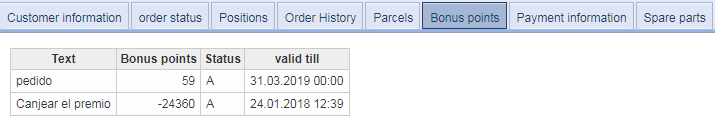

In [110]:
data[data['SCM_N_ORDER_NR'] == 103202267][data.columns[:20]]

,SCM_N_ORDER_POS_NR,SCM_N_ORDER_NR,TDT_T_KEY_ORDER_DATE,THR_C_KEY_ORDER_HOUR,SIT_N_KEY_SITE,CUS_N_KEY_CUSTOMER,SCM_SALES_BMF,SCM_SALES_CANCEL_BMF,SCM_D_FINANCE_CM1,SCM_D_FINANCE_CM2,SCM_D_ORIG_FINANCE_ORDER_NET,SCM_AP_ID,SCM_AS_ID,SCM_MASTER_AP_ID,SCM_IS_ZSP_ORDER,SCM_C_ORDER_STATUS,CTP_N_KEY_CUSTOMER_TYPE,SCM_OCI_LAND,SCM_D_FC_ID,SCM_D_PC_DSP
289601,440160554,103202267,2018-01-24,16:10,15,17667361,0.00,0.0,-192.6400,-196.5214,0.0000,34082,1109434,34082,0,L,0,D,326,1
289602,440160555,103202267,2018-01-24,16:10,15,17667361,64.95,0.0,20.1798,19.4867,54.5798,34082,560581,34082,0,L,0,D,326,1
289603,440160556,103202267,2018-01-24,16:10,15,17667361,-4.55,0.0,-3.8235,-3.8235,-3.8235,0,6,42715,0,L,0,D,0,0


In [111]:
arts[arts['AP_ID'] == 34082]

,AP_SHORT_TEXT,AP_ID,AP_PP_ID,PP_ID,PP_NAME,AP_NAME
382,"- 1,00-1,35 m lang",34082,24560,24560,Hands Free Leine,"Hands Free Leine - 1,00-1,35 m lang"


<html><head>


<!-- Load require.js. Delete this if your page already loads require.js -->
<script src="https://cdnjs.cloudflare.com/ajax/libs/require.js/2.3.4/require.min.js" integrity="sha256-Ae2Vz/4ePdIu6ZyI/5ZGsYnb+m0JlOmKPjt6XZ9JJkA=" crossorigin="anonymous"></script>
<script src="https://unpkg.com/@jupyter-widgets/html-manager@*/dist/embed-amd.js" crossorigin="anonymous"></script>
<script type="application/vnd.jupyter.widget-state+json">
{
    "version_major": 2,
    "version_minor": 0,
    "state": {}
}
</script>
</head>
<body>


</body>
</html>
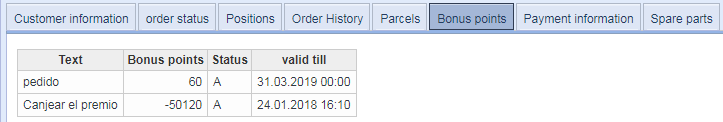


In [112]:
data[data['SCM_N_ORDER_NR'] == 105898119][data.columns[:20]]

,SCM_N_ORDER_POS_NR,SCM_N_ORDER_NR,TDT_T_KEY_ORDER_DATE,THR_C_KEY_ORDER_HOUR,SIT_N_KEY_SITE,CUS_N_KEY_CUSTOMER,SCM_SALES_BMF,SCM_SALES_CANCEL_BMF,SCM_D_FINANCE_CM1,SCM_D_FINANCE_CM2,SCM_D_ORIG_FINANCE_ORDER_NET,SCM_AP_ID,SCM_AS_ID,SCM_MASTER_AP_ID,SCM_IS_ZSP_ORDER,SCM_C_ORDER_STATUS,CTP_N_KEY_CUSTOMER_TYPE,SCM_OCI_LAND,SCM_D_FC_ID,SCM_D_PC_DSP
287651,451588925,105898119,2018-03-04,17:59,15,17667361,-4.55,0.0,-3.8235,-3.8235,-3.8235,0,6,42715,0,L,0,D,0,0
287652,451588923,105898119,2018-03-04,17:59,15,17667361,0.00,0.0,-206.1000,-210.8398,0.0000,34082,1109434,34082,0,L,0,D,328,1
287653,451588924,105898119,2018-03-04,17:59,15,17667361,64.95,0.0,20.2298,19.4399,54.5798,34082,560581,34082,0,L,0,D,328,1


In [113]:
arts[arts['AP_ID'] == 34082]

,AP_SHORT_TEXT,AP_ID,AP_PP_ID,PP_ID,PP_NAME,AP_NAME
382,"- 1,00-1,35 m lang",34082,24560,24560,Hands Free Leine,"Hands Free Leine - 1,00-1,35 m lang"


#### Customer ID 18907504

In [114]:
data[data['CUS_N_KEY_CUSTOMER'] == 18907504].groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum()\
[data[data['CUS_N_KEY_CUSTOMER'] == 18907504].groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum() < 0]

SCM_N_ORDER_NR
104583807   -2.3748
104585359   -5.8030
104585952   -3.2859
104586248   -6.1613
104651680   -2.9062
104711580   -6.1613
104714718   -3.2859
104801149   -2.4524
104941232   -2.3748
104945803   -2.3748
104946679   -2.3748
104947356   -2.3748
104950715   -2.3748
104951495   -2.3748
105100150   -2.4524
105100579   -2.3748
105165825   -2.3748
105169894   -3.2859
105279913   -2.6506
105280113   -1.7310
105281831   -1.3296
105419936   -2.3748
105420425   -2.3748
105420650   -2.3748
105421087   -2.3748
105426544   -3.2859
105432338   -3.2859
105527312   -2.3748
105528051   -2.3748
105528901   -4.6685
105531535   -0.0910
105586261   -1.7344
105691428   -2.3748
105692221   -2.3748
106608688   -3.3059
Name: SCM_D_FINANCE_CM1, dtype: float64

In [115]:
data[data['SCM_N_ORDER_NR'].isin(data[data['CUS_N_KEY_CUSTOMER'] == 18907504].groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum()\
[data[data['CUS_N_KEY_CUSTOMER'] == 18907504].groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum() < 0].index.values)][data.columns[:20]]

,SCM_N_ORDER_POS_NR,SCM_N_ORDER_NR,TDT_T_KEY_ORDER_DATE,THR_C_KEY_ORDER_HOUR,SIT_N_KEY_SITE,CUS_N_KEY_CUSTOMER,SCM_SALES_BMF,SCM_SALES_CANCEL_BMF,SCM_D_FINANCE_CM1,SCM_D_FINANCE_CM2,SCM_D_ORIG_FINANCE_ORDER_NET,SCM_AP_ID,SCM_AS_ID,SCM_MASTER_AP_ID,SCM_IS_ZSP_ORDER,SCM_C_ORDER_STATUS,CTP_N_KEY_CUSTOMER_TYPE,SCM_OCI_LAND,SCM_D_FC_ID,SCM_D_PC_DSP
452631,454568367,106608688,2018-03-14,15:29,15,18907504,97.99,0.0,11.6194,7.1364,91.5794,68150,1936038,68150,0,L,0,D,331,1
452632,454569071,106608688,2018-03-14,15:29,15,18907504,-9.80,0.0,-9.1589,-9.1589,-9.1589,0,1,6169,0,L,0,D,0,0
452633,454569072,106608688,2018-03-14,15:29,15,18907504,-6.17,0.0,-5.7664,-5.7664,-5.7664,0,6,42715,0,L,0,D,0,0
452634,450712403,105691428,2018-03-01,14:18,15,18907504,-3.78,0.0,-3.5327,-3.5327,-3.5327,0,6,42715,0,L,0,D,0,0
452635,450712400,105691428,2018-03-01,14:18,15,18907504,59.99,0.0,6.7654,2.6124,56.0654,52564,1040761,52564,0,L,0,D,331,1
452636,450712401,105691428,2018-03-01,14:18,15,18907504,-6.00,0.0,-5.6075,-5.6075,-5.6075,0,1,6169,0,L,0,D,0,0
452637,450715648,105692221,2018-03-01,14:27,15,18907504,-6.00,0.0,-5.6075,-5.6075,-5.6075,0,1,6169,0,L,0,D,0,0
452638,450715649,105692221,2018-03-01,14:27,15,18907504,-3.78,0.0,-3.5327,-3.5327,-3.5327,0,6,42715,0,L,0,D,0,0
452639,450715647,105692221,2018-03-01,14:27,15,18907504,59.99,0.0,6.7654,2.6124,56.0654,52564,1040761,52564,0,L,0,D,331,1
452640,450267126,105586261,2018-02-28,09:45,15,18907504,99.98,0.0,13.4993,9.0163,93.4393,68150,1936037,68150,0,L,0,D,331,1


#### Customer ID 18841695

In [116]:
data[data['CUS_N_KEY_CUSTOMER'] == 18841695].groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum()\
[data[data['CUS_N_KEY_CUSTOMER'] == 18841695].groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum() < 0]

SCM_N_ORDER_NR
103659304   -4.4664
103663426   -2.6545
103664222   -2.7333
103735016   -1.2000
103827994   -0.0546
103828416   -1.9291
103828660   -6.7329
103986355   -2.4524
103988019   -1.0268
103989657   -2.3748
103989862   -1.0268
103992943   -3.2859
104086287   -0.6692
104087086   -1.5317
104102633   -2.3748
104187065   -2.3748
104195657   -2.3748
104249114   -2.3748
104249904   -2.3748
104311210   -6.0659
104322622   -2.3413
Name: SCM_D_FINANCE_CM1, dtype: float64

In [117]:
data[data['SCM_N_ORDER_NR'].isin(data[data['CUS_N_KEY_CUSTOMER'] == 18841695].groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum()\
[data[data['CUS_N_KEY_CUSTOMER'] == 18841695].groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum() < 0].index.values)][data.columns[40:]]

,REL_CM1,REL_CM2,WEEK_NUMBER,MONTH_NUMBER,IS_CM1_NEG_ORDER,ORDER_HAS_COUPON,ORDER_HAS_BP,ORDER_HAS_C+BP,LEAD_PG3_NAME,LEAD_PG4_NAME
408318,-11.025189,-11.025189,6,2,1,1,0,0,hundefutter_trockenfutter,royal_canin_veterinary_diet
408319,7.727296,7.727296,6,2,1,1,0,0,hundefutter_trockenfutter,royal_canin_veterinary_diet
408320,-6.943853,-6.943853,6,2,1,1,0,0,hundefutter_trockenfutter,royal_canin_veterinary_diet
408321,3.084689,-6.697021,6,2,1,1,0,0,hundefutter_trockenfutter,royal_canin_veterinary_diet
408322,1.566073,1.268823,6,2,1,1,0,0,hundefutter_trockenfutter,royal_canin_veterinary_diet
408323,14.912997,8.967862,6,2,1,1,0,0,hundefutter_trockenfutter,royal_canin_veterinary_diet
408324,-11.950231,-11.950231,6,2,1,1,0,0,hundefutter_trockenfutter,royal_canin_veterinary_diet
408325,-7.528633,-7.528633,6,2,1,1,0,0,hundefutter_trockenfutter,royal_canin_veterinary_diet
408329,-7.528364,-7.528364,6,2,1,1,0,0,katzenfutter_trockenfutter,royal_canin_veterinary_diet
408330,14.417413,5.567158,6,2,1,1,0,0,katzenfutter_trockenfutter,royal_canin_veterinary_diet


#### Customer ID 9700383

In [118]:
data[data['CUS_N_KEY_CUSTOMER'] == 9700383].groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM2'].sum()\
[data[data['CUS_N_KEY_CUSTOMER'] == 9700383].groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM2'].sum() < -8]

SCM_N_ORDER_NR
102187663   -12.7627
102403140   -15.4536
102641006   -13.1427
103207590    -8.1922
103620513   -18.0163
103785666    -8.1572
104140020   -16.7849
104271844    -9.2022
104960480    -8.2203
105639259    -8.7939
105961129   -12.4834
106250392   -12.7663
106508921    -9.6749
106626622   -11.4551
106792913   -14.1925
106962004   -10.6825
107288952   -10.3016
Name: SCM_D_FINANCE_CM2, dtype: float64

In [119]:
data[data['SCM_N_ORDER_NR'].isin(data[data['CUS_N_KEY_CUSTOMER'] == 9700383].groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM2'].sum()\
[data[data['CUS_N_KEY_CUSTOMER'] == 9700383].groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM2'].sum() < -8].index.values)]\
[data.columns[:20]]

,SCM_N_ORDER_POS_NR,SCM_N_ORDER_NR,TDT_T_KEY_ORDER_DATE,THR_C_KEY_ORDER_HOUR,SIT_N_KEY_SITE,CUS_N_KEY_CUSTOMER,SCM_SALES_BMF,SCM_SALES_CANCEL_BMF,SCM_D_FINANCE_CM1,SCM_D_FINANCE_CM2,SCM_D_ORIG_FINANCE_ORDER_NET,SCM_AP_ID,SCM_AS_ID,SCM_MASTER_AP_ID,SCM_IS_ZSP_ORDER,SCM_C_ORDER_STATUS,CTP_N_KEY_CUSTOMER_TYPE,SCM_OCI_LAND,SCM_D_FC_ID,SCM_D_PC_DSP
66577,457503895,107288952,2018-03-24,13:38,15,9700383,39.9900,0.00,6.3345,0.6657,36.3545,61104,1316011,61104,0,L,0,E2,327,116
66581,457503894,107288952,2018-03-24,13:38,15,9700383,32.9900,0.00,5.4309,1.6326,29.9909,61068,1308963,61068,0,L,0,E2,327,116
66582,457503897,107288952,2018-03-24,13:38,15,9700383,23.9900,0.00,5.2491,1.2222,21.8091,38430,1931312,38430,0,L,0,E2,327,116
66583,457503902,107288952,2018-03-24,13:38,15,9700383,-9.5700,0.00,-8.7000,-8.7000,-8.7000,0,6,42715,0,L,0,E2,0,0
66584,457503899,107288952,2018-03-24,13:38,15,9700383,-21.2700,0.00,-19.3364,-19.3364,-19.3364,0,4,5482,0,L,0,E2,0,0
66585,457503892,107288952,2018-03-24,13:38,15,9700383,23.9900,0.00,5.2491,1.2222,21.8091,38526,1931315,38526,0,L,0,E2,327,116
66586,457503893,107288952,2018-03-24,13:38,15,9700383,14.8900,0.00,5.1364,2.6182,13.5364,69608,2132307,69608,0,L,0,E2,327,116
66587,457503901,107288952,2018-03-24,13:38,15,9700383,23.9900,0.00,5.2491,1.2222,21.8091,38527,1931417,38527,0,L,0,E2,327,116
66588,457503896,107288952,2018-03-24,13:38,15,9700383,22.9900,0.00,4.4800,3.7953,20.9000,73494,2154692,73494,0,L,0,E2,327,116
66589,457503898,107288952,2018-03-24,13:38,15,9700383,14.8900,0.00,5.1364,2.6182,13.5364,69605,2132306,69605,0,L,0,E2,327,116


In [120]:
data[data['CUS_N_KEY_CUSTOMER'] == 9700383]['SCM_N_ORDER_NR'].nunique()

57

In [121]:
(data[data['CUS_N_KEY_CUSTOMER'] == 9700383]['SCM_MASTER_AP_ID'] == 5482).sum()

56

- Discount group (5482) and Savings Plan (42715)applying both on same orders (actually deactivated)

<html><head>


<!-- Load require.js. Delete this if your page already loads require.js -->
<script src="https://cdnjs.cloudflare.com/ajax/libs/require.js/2.3.4/require.min.js" integrity="sha256-Ae2Vz/4ePdIu6ZyI/5ZGsYnb+m0JlOmKPjt6XZ9JJkA=" crossorigin="anonymous"></script>
<script src="https://unpkg.com/@jupyter-widgets/html-manager@*/dist/embed-amd.js" crossorigin="anonymous"></script>
<script type="application/vnd.jupyter.widget-state+json">
{
    "version_major": 2,
    "version_minor": 0,
    "state": {}
}
</script>
</head>
<body>


</body>
</html>
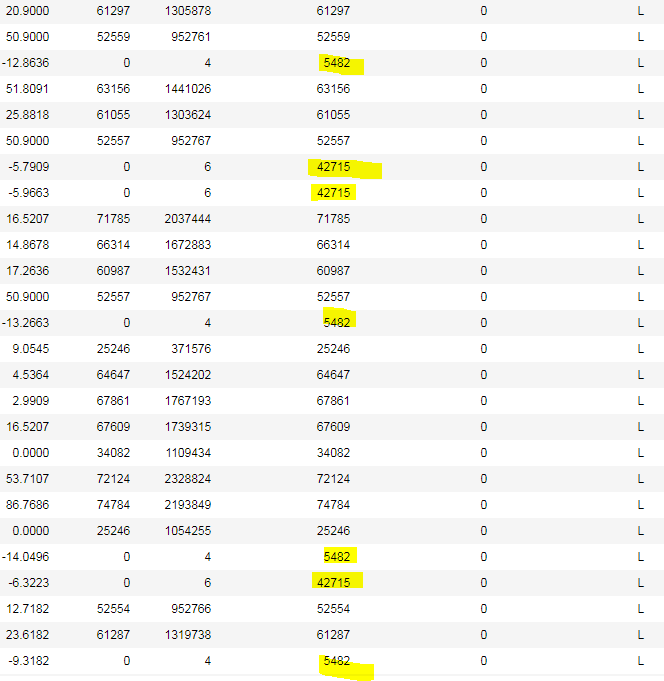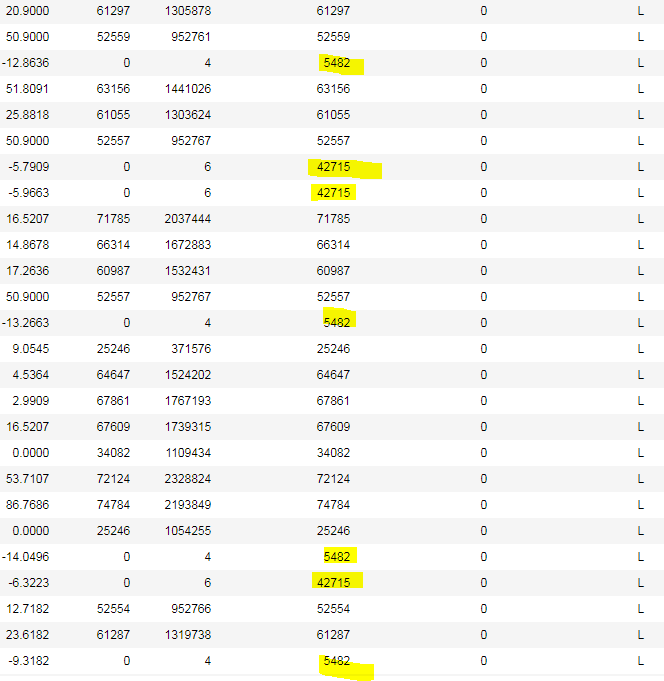

### Behaviours:

- Huge amount of bonuspoints to get products free and send it to DE 
- Coupons used with royal_canin_vet_diet or hills_prescription_diet and delivery abroad (A, F, IT, DE...)
- Savings Plan applying simultaneously with Discount Group (SCM_MASTER_AP_ID = 5482)

### Working on renewal logic and eligibility

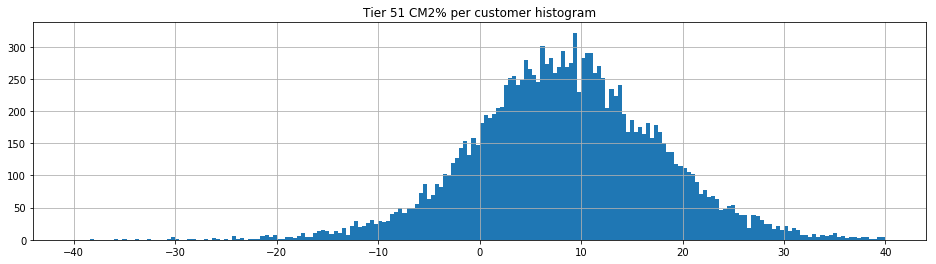

count    15155.000000
mean         8.480532
std          9.646821
min       -240.075938
25%          2.669971
50%          8.383133
75%         14.263530
max         79.602258
dtype: float64

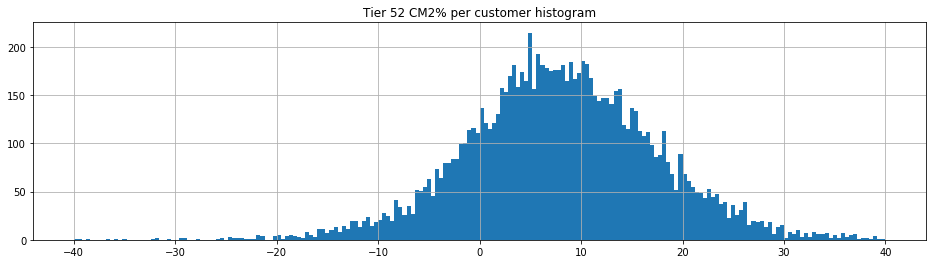

count    10008.000000
mean         7.694625
std         15.880085
min       -848.251148
25%          2.103524
50%          7.821969
75%         13.945201
max         53.839861
dtype: float64

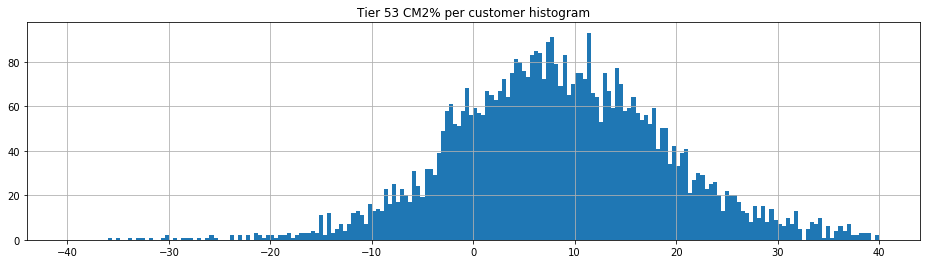

count    5017.000000
mean        8.211392
std        23.530728
min     -1468.754144
25%         1.576676
50%         8.139143
75%        15.284014
max        49.174623
dtype: float64

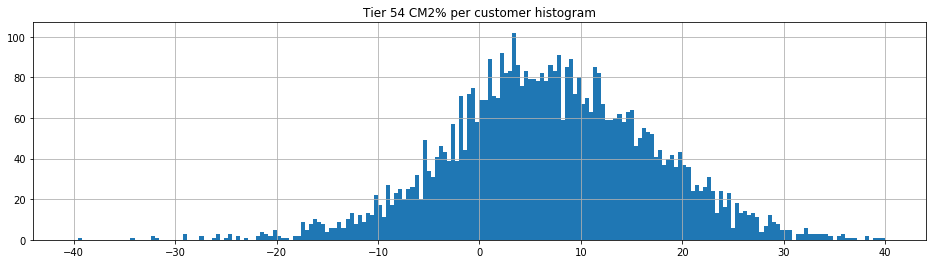

count    5109.000000
mean        5.923425
std        43.886871
min     -2893.373778
25%         0.491976
50%         6.769124
75%        13.655972
max        66.377675
dtype: float64

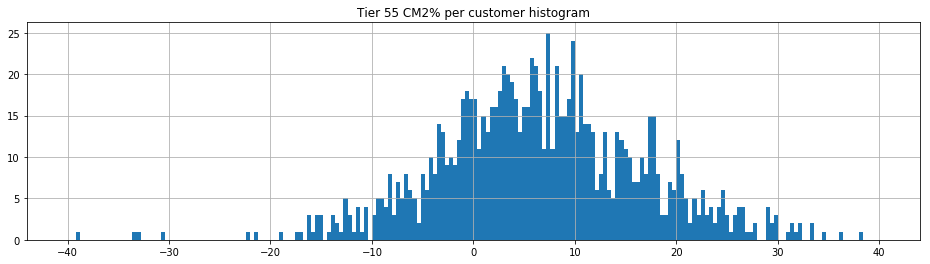

count    1032.000000
mean        6.591566
std        10.170191
min       -38.899603
25%         0.121672
50%         6.166016
75%        12.832696
max        44.972356
dtype: float64

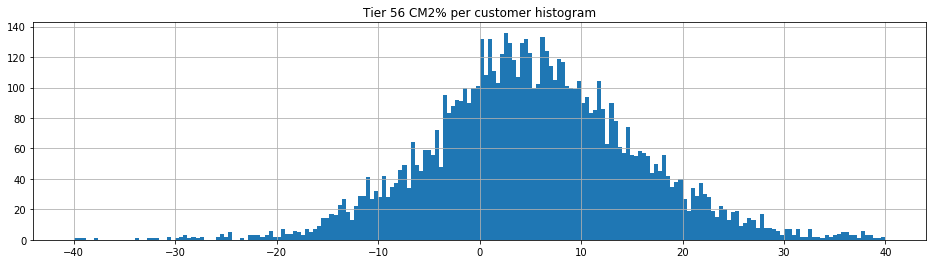

count    7070.000000
mean        5.258337
std        10.635453
min      -124.276745
25%        -1.118131
50%         4.935334
75%        11.645495
max        48.290942
dtype: float64

In [122]:
for tq in ztq:
    data_tier = data[data['CZP_ZTQ_ID'] == tq]
    cm2_per_cust = data_tier.groupby('CUS_N_KEY_CUSTOMER')['SCM_D_FINANCE_CM2'].sum() /\
    data_tier.groupby('CUS_N_KEY_CUSTOMER')['SCM_D_ORIG_FINANCE_ORDER_NET'].sum() * 100
    plt.figure(figsize=(16,4))
    cm2_per_cust.hist(bins=200, range=(-40, 40))
    title = 'Tier ' + str(tq) + ' CM2% per customer histogram'
    plt.title(title)
    plt.show()
    display(cm2_per_cust.describe())

In [123]:
cm2_thresholds = [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
cm2_thres_df = pd.DataFrame(columns=['ZTQ_ID', 'CM2%_threshold', 'eligibles'] )

for tq in ztq:
    data_tier = data[data['CZP_ZTQ_ID'] == tq]
    cm2_per_cust = data_tier.groupby('CUS_N_KEY_CUSTOMER')['SCM_D_FINANCE_CM2'].sum() /\
    data_tier.groupby('CUS_N_KEY_CUSTOMER')['SCM_D_ORIG_FINANCE_ORDER_NET'].sum() * 100
    
    for thres in cm2_thresholds:
        cm2_per_cust[cm2_per_cust > thres]
        cust_cm2 = cm2_per_cust[cm2_per_cust > thres].index.values
        row_ = [tq, thres, len(cust_cm2)]
        row_ = pd.DataFrame([row_], columns=cm2_thres_df.columns)
        cm2_thres_df = pd.concat([cm2_thres_df, row_], ignore_index=True)

Total customers in Tier  51 :  15155
Total customers in Tier  52 :  10008


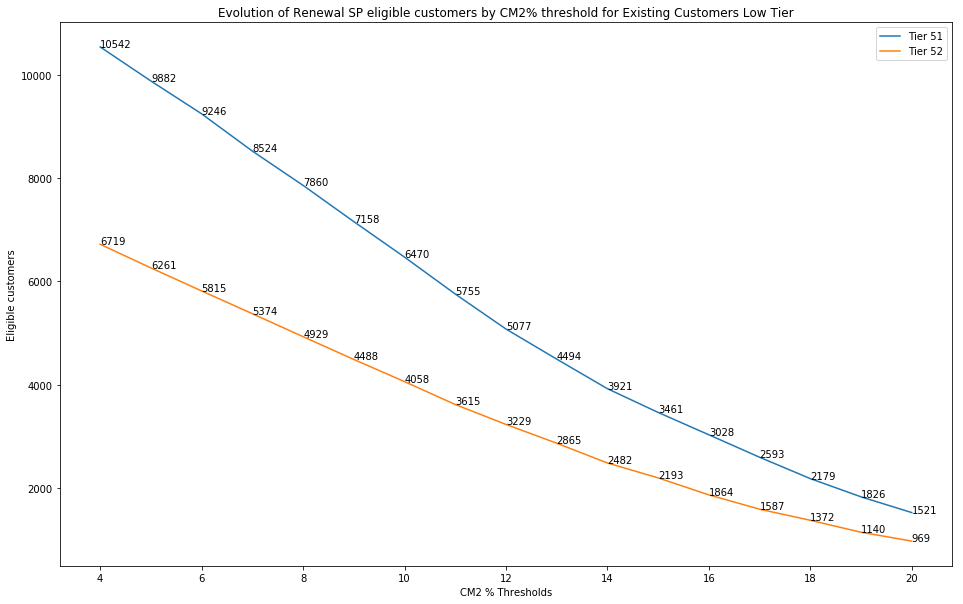

In [124]:
for tq in ztq[:2]:
    data_tier = data[data['CZP_ZTQ_ID'] == tq]
    cm2_per_cust = data_tier.groupby('CUS_N_KEY_CUSTOMER')['SCM_D_FINANCE_CM2'].sum() /\
    data_tier.groupby('CUS_N_KEY_CUSTOMER')['SCM_D_ORIG_FINANCE_ORDER_NET'].sum() * 100
    print('Total customers in Tier ', tq, ': ', len(cm2_per_cust))
    
plt.figure(figsize=(16, 10))

for tq in ztq[:2]:
    thres_data = cm2_thres_df[cm2_thres_df['ZTQ_ID'] == tq]
    plt.plot(thres_data['CM2%_threshold'], thres_data['eligibles'])
    
    ax = plt.gca()
    for x, y in list(zip(thres_data['CM2%_threshold'], thres_data['eligibles'])):
        ax.annotate(str(y), xy=(x, y))
    
plt.title('Evolution of Renewal SP eligible customers by CM2% threshold for Existing Customers Low Tier')
plt.xlabel('CM2 % Thresholds')
plt.ylabel('Eligible customers')
plt.legend(['Tier 51', 'Tier 52'])
plt.show()

Total customers in Tier  53 :  5017
Total customers in Tier  54 :  5109


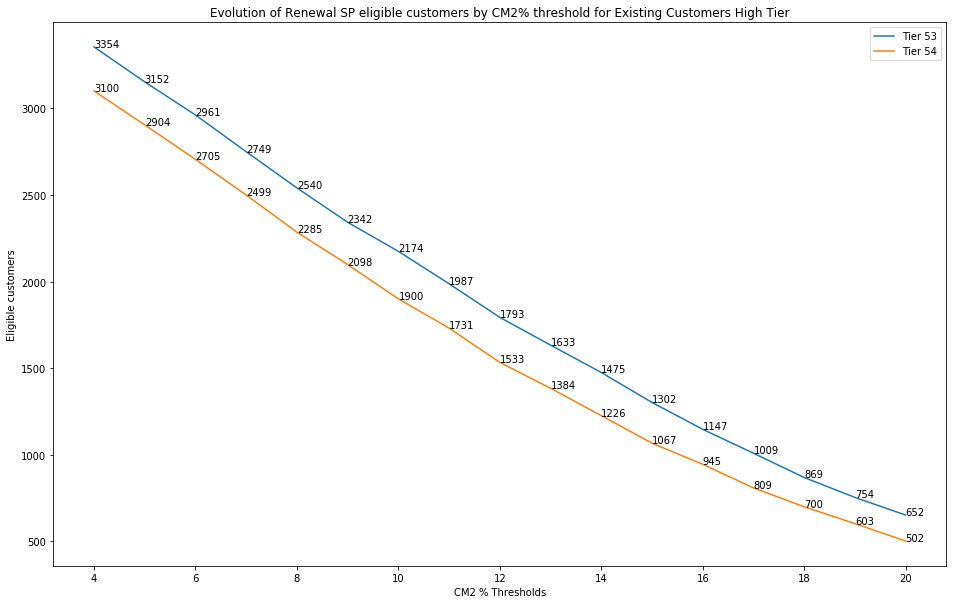

In [125]:
for tq in ztq[2:4]:
    data_tier = data[data['CZP_ZTQ_ID'] == tq]
    cm2_per_cust = data_tier.groupby('CUS_N_KEY_CUSTOMER')['SCM_D_FINANCE_CM2'].sum() /\
    data_tier.groupby('CUS_N_KEY_CUSTOMER')['SCM_D_ORIG_FINANCE_ORDER_NET'].sum() * 100
    print('Total customers in Tier ', tq, ': ', len(cm2_per_cust))

plt.figure(figsize=(16, 10))

for tq in ztq[2:4]:
    thres_data = cm2_thres_df[cm2_thres_df['ZTQ_ID'] == tq]
    plt.plot(thres_data['CM2%_threshold'], thres_data['eligibles'])
    
    ax = plt.gca()
    for x, y in list(zip(thres_data['CM2%_threshold'], thres_data['eligibles'])):
        ax.annotate(str(y), xy=(x, y))
    
plt.title('Evolution of Renewal SP eligible customers by CM2% threshold for Existing Customers High Tier')
plt.xlabel('CM2 % Thresholds')
plt.ylabel('Eligible customers')
plt.legend(['Tier 53', 'Tier 54'])
plt.show()

Total customers in Tier  55 :  1032
Total customers in Tier  56 :  7070


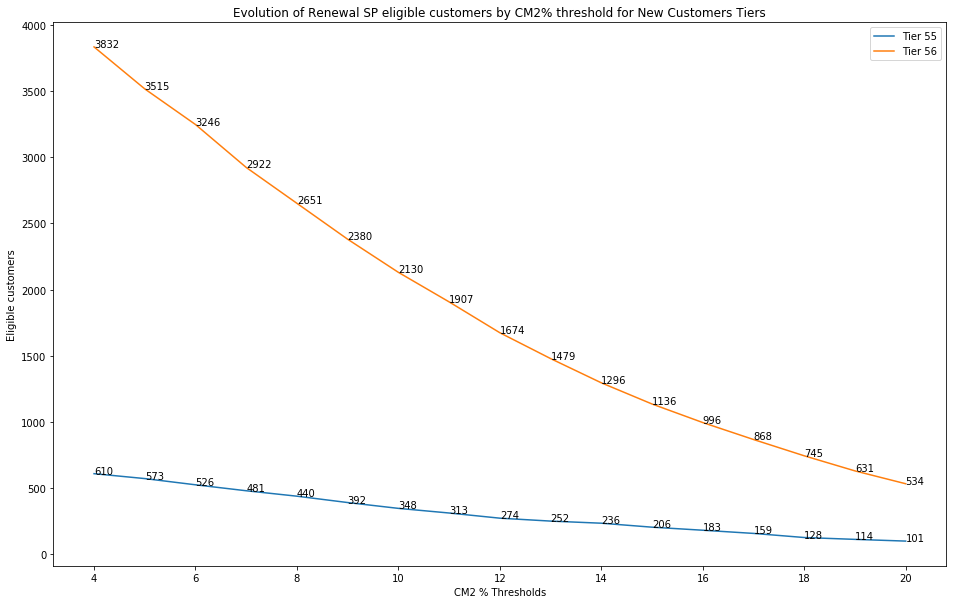

In [126]:
for tq in ztq[4:6]:
    data_tier = data[data['CZP_ZTQ_ID'] == tq]
    cm2_per_cust = data_tier.groupby('CUS_N_KEY_CUSTOMER')['SCM_D_FINANCE_CM2'].sum() /\
    data_tier.groupby('CUS_N_KEY_CUSTOMER')['SCM_D_ORIG_FINANCE_ORDER_NET'].sum() * 100
    print('Total customers in Tier ', tq, ': ', len(cm2_per_cust))

plt.figure(figsize=(16, 10))

for tq in ztq[4:6]:
    thres_data = cm2_thres_df[cm2_thres_df['ZTQ_ID'] == tq]
    plt.plot(thres_data['CM2%_threshold'], thres_data['eligibles'])
    
    ax = plt.gca()
    for x, y in list(zip(thres_data['CM2%_threshold'], thres_data['eligibles'])):
        ax.annotate(str(y), xy=(x, y))
    
plt.title('Evolution of Renewal SP eligible customers by CM2% threshold for New Customers Tiers')
plt.xlabel('CM2 % Thresholds')
plt.ylabel('Eligible customers')
plt.legend(['Tier 55', 'Tier 56'])
plt.show()

+ For existing customers tiers, around a 35-40% of the customers would be excluded from renewals with current cm2% threshold. In case of new customers tiers renewals, cm2% threshold of 5% is already excluding around 50-60% of the customers.
 
+ With last changes regarding no more compatibility between coupons and SP discount (in general) we might expect  CM1 and CM2 going a little up but also complainings or people leaving our platform in case they were using a huge amount of coupons.

In [127]:
sp_customers = pd.DataFrame(columns=['CUSTOMER_ID', 'TIER', 'ORDERS', 'SALES', 'NET_SALES', 'BASKET_AVG', 'CM1', 'CM1_AVG',
                                    'CM1%', '%_NEG_CM1_ORD', 'LOSS_IN_CM1', 'CM2', 'CM2_AVG',
                                    'CM2%', '%_NEG_CM2_ORD', 'LOSS_IN_CM2'])

for cus in data['CUS_N_KEY_CUSTOMER'].unique():
    cus_data = data[data['CUS_N_KEY_CUSTOMER'] == cus]
    tier = cus_data['CZP_ZTQ_ID'].unique()
    orders = cus_data['SCM_N_ORDER_NR'].nunique()
    sales = cus_data['SCM_SALES_BMF'].sum() - cus_data['SCM_SALES_CANCEL_BMF'].sum() 
    net_sales = cus_data['SCM_D_ORIG_FINANCE_ORDER_NET'].sum()
    basket_avg = sales / orders
    cm1 = cus_data['SCM_D_FINANCE_CM1'].sum()
    cm1_avg = cm1 / orders
    cm1_perc = cm1 / net_sales * 100
    neg_cm1_orders = len(cus_data.groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum()\
    [cus_data.groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum() < 0].index.values)
    perc_neg_cm1_orders = neg_cm1_orders / orders * 100
    total_loss_cm1 = cus_data.groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum()\
                    [cus_data.groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum() < 0].sum()
    cm2 = cus_data['SCM_D_FINANCE_CM2'].sum()
    cm2_avg = cm2 / orders
    cm2_perc = cm2 / net_sales * 100
    neg_cm2_orders = len(cus_data.groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM2'].sum()\
    [cus_data.groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM2'].sum() < 0].index.values)
    perc_neg_cm2_orders = neg_cm2_orders / orders * 100
    total_loss_cm2 = cus_data.groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM2'].sum()\
                    [cus_data.groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM2'].sum() < 0].sum()
    row_ = [cus, tier, orders, sales, net_sales, basket_avg, cm1, cm1_avg, cm1_perc, perc_neg_cm1_orders, total_loss_cm1,
           cm2, cm2_avg, cm2_perc, perc_neg_cm2_orders, total_loss_cm2]
    row_ = pd.DataFrame([row_], columns=sp_customers.columns)
    sp_customers = pd.concat([sp_customers, row_], ignore_index=True)

In [128]:
sp_customers.round(2)

,CUSTOMER_ID,TIER,ORDERS,SALES,NET_SALES,BASKET_AVG,CM1,CM1_AVG,CM1%,%_NEG_CM1_ORD,LOSS_IN_CM1,CM2,CM2_AVG,CM2%,%_NEG_CM2_ORD,LOSS_IN_CM2
0,2443666,[54],3,186.58,166.90,62.19,38.06,12.69,22.80,0.0,0.0,7.21,2.40,4.32,33.33,-1.30
1,8782381,[54],4,417.90,379.12,104.48,77.14,19.29,20.35,0.0,0.0,19.77,4.94,5.21,25.00,-4.25
2,8974642,[54],2,384.44,316.84,192.22,39.99,19.99,12.62,0.0,0.0,-4.49,-2.25,-1.42,100.00,-4.49
3,5744183,[52],1,102.78,91.67,102.78,16.87,16.87,18.41,0.0,0.0,-1.08,-1.08,-1.17,100.00,-1.08
4,1746711,[54],7,377.91,338.84,53.99,98.44,14.06,29.05,0.0,0.0,-5.56,-0.79,-1.64,85.71,-21.91
5,4060181,[54],4,189.75,214.81,47.44,53.24,13.31,24.78,0.0,0.0,18.94,4.74,8.82,25.00,-3.66
6,8396175,[54],1,152.86,133.47,152.86,31.34,31.34,23.48,0.0,0.0,9.43,9.43,7.06,0.00,0.00
7,5118684,[52],2,233.90,212.28,116.95,57.41,28.70,27.04,0.0,0.0,17.07,8.53,8.04,0.00,0.00
8,8910575,"[54, 53]",10,597.59,541.86,59.76,203.55,20.35,37.56,0.0,0.0,53.89,5.39,9.95,10.00,-1.39
9,8689478,[52],1,97.90,85.79,97.90,20.39,20.39,23.77,0.0,0.0,6.33,6.33,7.37,0.00,0.00


In [129]:
#sp_customers.round(2).to_csv('es_customers_q1.csv', sep=';', index=False, encoding='utf-8')